In [1]:
# Import Section
import csv
import codecs
import sys
import io
import numpy as np
import pandas as pd
import scipy as sp

# For Regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statistics import mean

from sklearn import tree
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge

# Python script for confusion matrix creation. 
from sklearn.metrics import *
from numpy import mean
from numpy import std
from sklearn import metrics

import catboost as cb

In [2]:
dataset=pd.read_excel("Des_cod_1056_92-29.xlsx",index_col=0)

In [3]:
dataset.shape

(1056, 30)

In [4]:
dataset

,Number of atoms,Relative number of N atoms,Relative number of Cl atoms,Wiener index,Kier&Hall index (order 3),Average Information content (order 0),Balaban index,Max partial charge for a N atom [Zefirov's PC],Min partial charge for a N atom [Zefirov's PC],Polarity parameter / square distance,...,Max net atomic charge for a C atom,Tot dipole of the molecule,Image of the Onsager-Kirkwood solvation energy,RNCS Relative negative charged SA (SAMNEG*RNCG) [Quantum-Chemical PC],Max SIGMA-SIGMA bond order,Max PI-PI bond order,Min valency of a N atom,Avg valency of a N atom,Min (0.1) bond order of a N atom,Act
Structure,,,,,,,,,,,,,,,,,,,,,
"""1Co""",101,0.0297,0.0198,26631,9.9558,1.6397,0.8438,-0.0893,-0.0926,0.1809,...,0.2878,9.4339,0.1088,0.3086,0.9950,0.9488,3.1423,3.2054,0.2697,0.853
"""2Co""",107,0.0280,0.0187,29652,10.4813,1.6785,0.9663,-0.0893,-0.0924,0.1626,...,0.2677,8.7587,0.0907,0.2536,0.9962,0.9470,3.1279,3.1937,0.2686,0.987
"""3Co""",113,0.0265,0.0177,32339,10.8588,1.6722,0.8453,-0.0892,-0.0923,0.1809,...,0.2876,9.3381,0.0998,0.2020,0.9960,0.9490,3.1339,3.2001,0.2607,0.773
"""4Co""",104,0.0288,0.0192,28065,10.1517,1.6509,0.8427,-0.0893,-0.0926,0.1809,...,0.2872,9.2435,0.1027,0.1485,0.9951,0.9489,3.1410,3.2049,0.2687,0.760
"""5Co""",110,0.0273,0.0182,31138,10.6903,1.6850,0.9670,-0.0893,-0.0924,0.1626,...,0.2648,8.4606,0.0832,0.2797,0.9962,0.9471,3.1275,3.1930,0.2680,0.893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""1052Co""",86,0.0349,0.0233,17187,8.0898,1.7691,0.9049,-0.0892,-0.0923,0.1752,...,0.3161,9.7498,0.1395,0.3712,0.9947,0.9671,3.1652,3.1986,0.2608,0.370
"""1053Co""",74,0.0405,0.0270,13291,7.1869,1.7552,0.8931,-0.0893,-0.0926,0.1752,...,0.3158,10.0471,0.1614,0.6300,0.9946,0.9681,3.1698,3.2042,0.2656,1.020
"""1054Co""",80,0.0375,0.0250,15195,7.7123,1.7671,0.8967,-0.0893,-0.0924,0.1752,...,0.3160,9.8221,0.1476,0.4963,0.9955,0.9677,3.1676,3.2025,0.2633,0.832


In [5]:
x = dataset.drop(['Act'],axis=1).astype (float)
y = dataset['Act']

In [6]:
x.shape

(1056, 29)

In [7]:
y

Structure
"1Co"       0.853
"2Co"       0.987
"3Co"       0.773
"4Co"       0.760
"5Co"       0.893
            ...  
"1052Co"    0.370
"1053Co"    1.020
"1054Co"    0.832
"1055Co"    0.701
"1056Co"    1.090
Name: Act, Length: 1056, dtype: float64

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.1, random_state = 27, shuffle=True)

In [9]:
x_test.shape

(106, 29)

In [10]:
x_train.shape

(950, 29)

In [11]:
#In order to train and optimize our model, we need to utilize CatBoost library integrated tool for 
#combining features and target variables into a train and test dataset. This pooling allows you to pinpoint target variables, predictors, and the list of categorical features, while the pool constructor will combine those inputs 
#and pass them to the model.
train_dataset = cb.Pool(x_train, y_train) 
test_dataset = cb.Pool(x_test, y_test)

In [12]:
#cb.CatBoostRegressor?

In [13]:
regressor = cb.CatBoostRegressor(loss_function='RMSE')

In [14]:
regressor.fit(train_dataset)

Learning rate set to 0.040613
0:	learn: 0.4855271	total: 176ms	remaining: 2m 55s
1:	learn: 0.4781936	total: 195ms	remaining: 1m 37s
2:	learn: 0.4709156	total: 213ms	remaining: 1m 10s
3:	learn: 0.4636739	total: 221ms	remaining: 55.1s
4:	learn: 0.4565405	total: 229ms	remaining: 45.6s
5:	learn: 0.4506379	total: 236ms	remaining: 39.1s
6:	learn: 0.4450686	total: 243ms	remaining: 34.5s
7:	learn: 0.4387403	total: 250ms	remaining: 31.1s
8:	learn: 0.4340313	total: 258ms	remaining: 28.4s
9:	learn: 0.4295659	total: 265ms	remaining: 26.2s
10:	learn: 0.4245928	total: 272ms	remaining: 24.4s
11:	learn: 0.4195355	total: 278ms	remaining: 22.9s
12:	learn: 0.4152093	total: 285ms	remaining: 21.7s
13:	learn: 0.4104401	total: 292ms	remaining: 20.6s
14:	learn: 0.4055217	total: 299ms	remaining: 19.6s
15:	learn: 0.4009895	total: 306ms	remaining: 18.8s
16:	learn: 0.3964045	total: 313ms	remaining: 18.1s
17:	learn: 0.3924115	total: 319ms	remaining: 17.4s
18:	learn: 0.3887804	total: 326ms	remaining: 16.8s
19:	lear

161:	learn: 0.2353516	total: 1.51s	remaining: 7.79s
162:	learn: 0.2352553	total: 1.52s	remaining: 7.79s
163:	learn: 0.2341196	total: 1.53s	remaining: 7.8s
164:	learn: 0.2336227	total: 1.54s	remaining: 7.79s
165:	learn: 0.2330673	total: 1.55s	remaining: 7.78s
166:	learn: 0.2323350	total: 1.55s	remaining: 7.76s
167:	learn: 0.2317124	total: 1.56s	remaining: 7.74s
168:	learn: 0.2312481	total: 1.57s	remaining: 7.71s
169:	learn: 0.2305000	total: 1.57s	remaining: 7.69s
170:	learn: 0.2299994	total: 1.58s	remaining: 7.67s
171:	learn: 0.2296348	total: 1.59s	remaining: 7.65s
172:	learn: 0.2290145	total: 1.59s	remaining: 7.63s
173:	learn: 0.2282934	total: 1.6s	remaining: 7.61s
174:	learn: 0.2277905	total: 1.61s	remaining: 7.59s
175:	learn: 0.2271185	total: 1.61s	remaining: 7.57s
176:	learn: 0.2264624	total: 1.62s	remaining: 7.54s
177:	learn: 0.2260715	total: 1.63s	remaining: 7.52s
178:	learn: 0.2257399	total: 1.64s	remaining: 7.5s
179:	learn: 0.2255869	total: 1.64s	remaining: 7.49s
180:	learn: 0.2

326:	learn: 0.1669675	total: 2.8s	remaining: 5.76s
327:	learn: 0.1666246	total: 2.81s	remaining: 5.75s
328:	learn: 0.1665300	total: 2.82s	remaining: 5.75s
329:	learn: 0.1660999	total: 2.83s	remaining: 5.74s
330:	learn: 0.1657930	total: 2.83s	remaining: 5.72s
331:	learn: 0.1652340	total: 2.84s	remaining: 5.71s
332:	learn: 0.1646362	total: 2.85s	remaining: 5.7s
333:	learn: 0.1644830	total: 2.85s	remaining: 5.69s
334:	learn: 0.1642431	total: 2.86s	remaining: 5.68s
335:	learn: 0.1642123	total: 2.87s	remaining: 5.67s
336:	learn: 0.1641805	total: 2.87s	remaining: 5.65s
337:	learn: 0.1636923	total: 2.88s	remaining: 5.64s
338:	learn: 0.1634031	total: 2.89s	remaining: 5.63s
339:	learn: 0.1630134	total: 2.89s	remaining: 5.62s
340:	learn: 0.1627524	total: 2.9s	remaining: 5.61s
341:	learn: 0.1625840	total: 2.91s	remaining: 5.59s
342:	learn: 0.1622728	total: 2.91s	remaining: 5.58s
343:	learn: 0.1618805	total: 2.92s	remaining: 5.57s
344:	learn: 0.1614019	total: 2.93s	remaining: 5.56s
345:	learn: 0.1

494:	learn: 0.1239563	total: 4.05s	remaining: 4.13s
495:	learn: 0.1237988	total: 4.07s	remaining: 4.13s
496:	learn: 0.1236882	total: 4.08s	remaining: 4.13s
497:	learn: 0.1236363	total: 4.08s	remaining: 4.12s
498:	learn: 0.1234205	total: 4.09s	remaining: 4.11s
499:	learn: 0.1232276	total: 4.1s	remaining: 4.1s
500:	learn: 0.1231258	total: 4.1s	remaining: 4.09s
501:	learn: 0.1227461	total: 4.11s	remaining: 4.08s
502:	learn: 0.1226529	total: 4.12s	remaining: 4.07s
503:	learn: 0.1226002	total: 4.13s	remaining: 4.06s
504:	learn: 0.1222983	total: 4.13s	remaining: 4.05s
505:	learn: 0.1220840	total: 4.14s	remaining: 4.04s
506:	learn: 0.1219893	total: 4.14s	remaining: 4.03s
507:	learn: 0.1217078	total: 4.15s	remaining: 4.02s
508:	learn: 0.1215664	total: 4.16s	remaining: 4.01s
509:	learn: 0.1214093	total: 4.17s	remaining: 4s
510:	learn: 0.1210582	total: 4.17s	remaining: 3.99s
511:	learn: 0.1207939	total: 4.18s	remaining: 3.98s
512:	learn: 0.1205320	total: 4.19s	remaining: 3.97s
513:	learn: 0.1203

655:	learn: 0.0974454	total: 5.37s	remaining: 2.81s
656:	learn: 0.0972865	total: 5.38s	remaining: 2.81s
657:	learn: 0.0969862	total: 5.39s	remaining: 2.8s
658:	learn: 0.0968027	total: 5.4s	remaining: 2.79s
659:	learn: 0.0967067	total: 5.41s	remaining: 2.79s
660:	learn: 0.0966247	total: 5.42s	remaining: 2.78s
661:	learn: 0.0965209	total: 5.42s	remaining: 2.77s
662:	learn: 0.0963256	total: 5.43s	remaining: 2.76s
663:	learn: 0.0962130	total: 5.44s	remaining: 2.75s
664:	learn: 0.0960371	total: 5.45s	remaining: 2.74s
665:	learn: 0.0959916	total: 5.46s	remaining: 2.74s
666:	learn: 0.0958371	total: 5.46s	remaining: 2.73s
667:	learn: 0.0956535	total: 5.47s	remaining: 2.72s
668:	learn: 0.0955773	total: 5.48s	remaining: 2.71s
669:	learn: 0.0954025	total: 5.49s	remaining: 2.7s
670:	learn: 0.0951823	total: 5.5s	remaining: 2.7s
671:	learn: 0.0950430	total: 5.52s	remaining: 2.69s
672:	learn: 0.0949000	total: 5.53s	remaining: 2.69s
673:	learn: 0.0948376	total: 5.54s	remaining: 2.68s
674:	learn: 0.094

814:	learn: 0.0791484	total: 6.67s	remaining: 1.51s
815:	learn: 0.0790001	total: 6.68s	remaining: 1.51s
816:	learn: 0.0789583	total: 6.69s	remaining: 1.5s
817:	learn: 0.0787961	total: 6.7s	remaining: 1.49s
818:	learn: 0.0786845	total: 6.71s	remaining: 1.48s
819:	learn: 0.0786422	total: 6.71s	remaining: 1.47s
820:	learn: 0.0785859	total: 6.72s	remaining: 1.47s
821:	learn: 0.0785545	total: 6.73s	remaining: 1.46s
822:	learn: 0.0784762	total: 6.74s	remaining: 1.45s
823:	learn: 0.0783449	total: 6.75s	remaining: 1.44s
824:	learn: 0.0783181	total: 6.76s	remaining: 1.43s
825:	learn: 0.0782440	total: 6.77s	remaining: 1.43s
826:	learn: 0.0780984	total: 6.77s	remaining: 1.42s
827:	learn: 0.0779524	total: 6.78s	remaining: 1.41s
828:	learn: 0.0778602	total: 6.79s	remaining: 1.4s
829:	learn: 0.0777950	total: 6.8s	remaining: 1.39s
830:	learn: 0.0777606	total: 6.8s	remaining: 1.38s
831:	learn: 0.0777088	total: 6.81s	remaining: 1.38s
832:	learn: 0.0776661	total: 6.82s	remaining: 1.37s
833:	learn: 0.077

997:	learn: 0.0639529	total: 8.13s	remaining: 16.3ms
998:	learn: 0.0638532	total: 8.13s	remaining: 8.14ms
999:	learn: 0.0637838	total: 8.14s	remaining: 0us


In [15]:
# compute the testing accuracy
y_pred = regressor.predict(x_test)

In [16]:
y_pred_train = regressor.predict(x_train)

In [17]:
  print("\n")
  print("overall Performance: ", )



overall Performance: 


In [18]:
  # model evaluation for testing set
  mae = metrics.mean_absolute_error(y_test, y_pred)
  mse = metrics.mean_squared_error(y_test, y_pred)
  r2 = metrics.r2_score(y_test, y_pred)

In [19]:
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.11709835504776059
MSE is 0.023745082612228987
R2 score is 0.8698153386610383


In [20]:
  # model evaluation for training set
maeTrain = metrics.mean_absolute_error(y_train, y_pred_train)
mseTrain = metrics.mean_squared_error(y_train, y_pred_train)
r2Train = metrics.r2_score(y_train, y_pred_train)

In [21]:
print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(maeTrain))
print('MSE is {}'.format(mseTrain))
print('R2 score is {}'.format(r2Train))

The model performance for training set
--------------------------------------
MAE is 0.0485154269837125
MSE is 0.004068370172049101
R2 score is 0.9832374185117548


In [22]:
cvscoretrain = (cross_val_score(regressor,x_train,y_train.ravel(),cv=5).mean())

Learning rate set to 0.039206
0:	learn: 0.4870194	total: 12.3ms	remaining: 12.3s
1:	learn: 0.4796876	total: 23.2ms	remaining: 11.6s
2:	learn: 0.4731256	total: 31.4ms	remaining: 10.4s
3:	learn: 0.4661411	total: 41.3ms	remaining: 10.3s
4:	learn: 0.4593541	total: 55.2ms	remaining: 11s
5:	learn: 0.4535634	total: 64.6ms	remaining: 10.7s
6:	learn: 0.4475108	total: 73.7ms	remaining: 10.5s
7:	learn: 0.4414378	total: 82.9ms	remaining: 10.3s
8:	learn: 0.4368301	total: 91.1ms	remaining: 10s
9:	learn: 0.4320020	total: 99.5ms	remaining: 9.85s
10:	learn: 0.4278979	total: 108ms	remaining: 9.7s
11:	learn: 0.4218715	total: 116ms	remaining: 9.52s
12:	learn: 0.4173724	total: 124ms	remaining: 9.42s
13:	learn: 0.4128869	total: 133ms	remaining: 9.35s
14:	learn: 0.4083235	total: 141ms	remaining: 9.27s
15:	learn: 0.4051665	total: 150ms	remaining: 9.21s
16:	learn: 0.4012954	total: 158ms	remaining: 9.16s
17:	learn: 0.3976954	total: 167ms	remaining: 9.12s
18:	learn: 0.3937944	total: 175ms	remaining: 9.04s
19:	le

173:	learn: 0.2253477	total: 1.53s	remaining: 7.26s
174:	learn: 0.2248196	total: 1.54s	remaining: 7.27s
175:	learn: 0.2244638	total: 1.55s	remaining: 7.27s
176:	learn: 0.2239523	total: 1.56s	remaining: 7.27s
177:	learn: 0.2232711	total: 1.58s	remaining: 7.28s
178:	learn: 0.2226055	total: 1.6s	remaining: 7.35s
179:	learn: 0.2216711	total: 1.63s	remaining: 7.42s
180:	learn: 0.2213587	total: 1.64s	remaining: 7.42s
181:	learn: 0.2207086	total: 1.65s	remaining: 7.41s
182:	learn: 0.2201673	total: 1.66s	remaining: 7.4s
183:	learn: 0.2197362	total: 1.67s	remaining: 7.42s
184:	learn: 0.2192517	total: 1.69s	remaining: 7.42s
185:	learn: 0.2191596	total: 1.7s	remaining: 7.43s
186:	learn: 0.2189873	total: 1.72s	remaining: 7.5s
187:	learn: 0.2185375	total: 1.75s	remaining: 7.55s
188:	learn: 0.2182275	total: 1.77s	remaining: 7.59s
189:	learn: 0.2181566	total: 1.78s	remaining: 7.58s
190:	learn: 0.2176042	total: 1.79s	remaining: 7.58s
191:	learn: 0.2168792	total: 1.8s	remaining: 7.56s
192:	learn: 0.216

348:	learn: 0.1600983	total: 3.26s	remaining: 6.07s
349:	learn: 0.1598145	total: 3.27s	remaining: 6.07s
350:	learn: 0.1593626	total: 3.28s	remaining: 6.06s
351:	learn: 0.1590376	total: 3.29s	remaining: 6.05s
352:	learn: 0.1587292	total: 3.3s	remaining: 6.04s
353:	learn: 0.1586298	total: 3.31s	remaining: 6.03s
354:	learn: 0.1583559	total: 3.31s	remaining: 6.02s
355:	learn: 0.1582336	total: 3.33s	remaining: 6.03s
356:	learn: 0.1576658	total: 3.34s	remaining: 6.02s
357:	learn: 0.1572560	total: 3.35s	remaining: 6.01s
358:	learn: 0.1570515	total: 3.36s	remaining: 6s
359:	learn: 0.1566750	total: 3.37s	remaining: 6s
360:	learn: 0.1563066	total: 3.38s	remaining: 5.98s
361:	learn: 0.1560202	total: 3.39s	remaining: 5.97s
362:	learn: 0.1558008	total: 3.39s	remaining: 5.96s
363:	learn: 0.1555632	total: 3.4s	remaining: 5.94s
364:	learn: 0.1550737	total: 3.41s	remaining: 5.93s
365:	learn: 0.1548768	total: 3.42s	remaining: 5.92s
366:	learn: 0.1545719	total: 3.42s	remaining: 5.9s
367:	learn: 0.1544844

508:	learn: 0.1162319	total: 4.75s	remaining: 4.58s
509:	learn: 0.1161502	total: 4.76s	remaining: 4.57s
510:	learn: 0.1160055	total: 4.77s	remaining: 4.56s
511:	learn: 0.1155981	total: 4.78s	remaining: 4.55s
512:	learn: 0.1151732	total: 4.78s	remaining: 4.54s
513:	learn: 0.1149551	total: 4.79s	remaining: 4.53s
514:	learn: 0.1145709	total: 4.8s	remaining: 4.52s
515:	learn: 0.1145233	total: 4.8s	remaining: 4.51s
516:	learn: 0.1142076	total: 4.81s	remaining: 4.5s
517:	learn: 0.1139470	total: 4.82s	remaining: 4.49s
518:	learn: 0.1136544	total: 4.83s	remaining: 4.47s
519:	learn: 0.1134814	total: 4.84s	remaining: 4.46s
520:	learn: 0.1133179	total: 4.84s	remaining: 4.45s
521:	learn: 0.1131056	total: 4.85s	remaining: 4.44s
522:	learn: 0.1128741	total: 4.86s	remaining: 4.43s
523:	learn: 0.1126604	total: 4.87s	remaining: 4.42s
524:	learn: 0.1124483	total: 4.88s	remaining: 4.41s
525:	learn: 0.1122254	total: 4.88s	remaining: 4.4s
526:	learn: 0.1120201	total: 4.89s	remaining: 4.39s
527:	learn: 0.11

673:	learn: 0.0868909	total: 6.26s	remaining: 3.03s
674:	learn: 0.0867983	total: 6.28s	remaining: 3.02s
675:	learn: 0.0867318	total: 6.29s	remaining: 3.01s
676:	learn: 0.0866273	total: 6.3s	remaining: 3s
677:	learn: 0.0865351	total: 6.31s	remaining: 3s
678:	learn: 0.0863106	total: 6.32s	remaining: 2.99s
679:	learn: 0.0861325	total: 6.33s	remaining: 2.98s
680:	learn: 0.0859721	total: 6.34s	remaining: 2.97s
681:	learn: 0.0858494	total: 6.35s	remaining: 2.96s
682:	learn: 0.0856013	total: 6.36s	remaining: 2.95s
683:	learn: 0.0855158	total: 6.37s	remaining: 2.94s
684:	learn: 0.0854623	total: 6.38s	remaining: 2.93s
685:	learn: 0.0853730	total: 6.39s	remaining: 2.92s
686:	learn: 0.0852289	total: 6.4s	remaining: 2.91s
687:	learn: 0.0850993	total: 6.41s	remaining: 2.9s
688:	learn: 0.0850065	total: 6.42s	remaining: 2.9s
689:	learn: 0.0849299	total: 6.42s	remaining: 2.89s
690:	learn: 0.0848034	total: 6.43s	remaining: 2.88s
691:	learn: 0.0847373	total: 6.44s	remaining: 2.87s
692:	learn: 0.0845196	

841:	learn: 0.0681304	total: 7.73s	remaining: 1.45s
842:	learn: 0.0680792	total: 7.74s	remaining: 1.44s
843:	learn: 0.0679679	total: 7.75s	remaining: 1.43s
844:	learn: 0.0679424	total: 7.76s	remaining: 1.42s
845:	learn: 0.0678552	total: 7.77s	remaining: 1.41s
846:	learn: 0.0677753	total: 7.78s	remaining: 1.41s
847:	learn: 0.0677098	total: 7.79s	remaining: 1.4s
848:	learn: 0.0675835	total: 7.8s	remaining: 1.39s
849:	learn: 0.0675026	total: 7.81s	remaining: 1.38s
850:	learn: 0.0674585	total: 7.82s	remaining: 1.37s
851:	learn: 0.0673867	total: 7.83s	remaining: 1.36s
852:	learn: 0.0672383	total: 7.84s	remaining: 1.35s
853:	learn: 0.0671977	total: 7.85s	remaining: 1.34s
854:	learn: 0.0671158	total: 7.86s	remaining: 1.33s
855:	learn: 0.0670081	total: 7.86s	remaining: 1.32s
856:	learn: 0.0670020	total: 7.87s	remaining: 1.31s
857:	learn: 0.0668715	total: 7.88s	remaining: 1.3s
858:	learn: 0.0668048	total: 7.89s	remaining: 1.29s
859:	learn: 0.0667198	total: 7.9s	remaining: 1.28s
860:	learn: 0.06

6:	learn: 0.4475395	total: 80.5ms	remaining: 11.4s
7:	learn: 0.4411595	total: 92ms	remaining: 11.4s
8:	learn: 0.4358092	total: 101ms	remaining: 11.1s
9:	learn: 0.4312559	total: 111ms	remaining: 10.9s
10:	learn: 0.4262404	total: 119ms	remaining: 10.7s
11:	learn: 0.4207329	total: 129ms	remaining: 10.6s
12:	learn: 0.4152987	total: 138ms	remaining: 10.4s
13:	learn: 0.4114918	total: 146ms	remaining: 10.3s
14:	learn: 0.4068911	total: 155ms	remaining: 10.2s
15:	learn: 0.4028289	total: 164ms	remaining: 10.1s
16:	learn: 0.3981353	total: 173ms	remaining: 10s
17:	learn: 0.3943464	total: 182ms	remaining: 9.95s
18:	learn: 0.3904285	total: 192ms	remaining: 9.9s
19:	learn: 0.3877546	total: 202ms	remaining: 9.88s
20:	learn: 0.3846053	total: 211ms	remaining: 9.83s
21:	learn: 0.3808222	total: 220ms	remaining: 9.76s
22:	learn: 0.3780297	total: 227ms	remaining: 9.62s
23:	learn: 0.3754302	total: 235ms	remaining: 9.57s
24:	learn: 0.3723608	total: 243ms	remaining: 9.49s
25:	learn: 0.3695482	total: 252ms	rema

181:	learn: 0.2225165	total: 1.79s	remaining: 8.07s
182:	learn: 0.2222924	total: 1.8s	remaining: 8.06s
183:	learn: 0.2220995	total: 1.81s	remaining: 8.05s
184:	learn: 0.2217294	total: 1.82s	remaining: 8.04s
185:	learn: 0.2214725	total: 1.83s	remaining: 8.02s
186:	learn: 0.2212354	total: 1.84s	remaining: 8.01s
187:	learn: 0.2210867	total: 1.85s	remaining: 7.99s
188:	learn: 0.2209626	total: 1.86s	remaining: 7.97s
189:	learn: 0.2202369	total: 1.86s	remaining: 7.96s
190:	learn: 0.2201635	total: 1.88s	remaining: 7.94s
191:	learn: 0.2200500	total: 1.88s	remaining: 7.92s
192:	learn: 0.2193165	total: 1.89s	remaining: 7.91s
193:	learn: 0.2191279	total: 1.9s	remaining: 7.91s
194:	learn: 0.2185976	total: 1.91s	remaining: 7.9s
195:	learn: 0.2185203	total: 1.92s	remaining: 7.89s
196:	learn: 0.2182381	total: 1.94s	remaining: 7.89s
197:	learn: 0.2178062	total: 1.95s	remaining: 7.89s
198:	learn: 0.2171029	total: 1.96s	remaining: 7.88s
199:	learn: 0.2164956	total: 1.97s	remaining: 7.88s
200:	learn: 0.2

352:	learn: 0.1576996	total: 3.31s	remaining: 6.07s
353:	learn: 0.1572125	total: 3.32s	remaining: 6.06s
354:	learn: 0.1568213	total: 3.35s	remaining: 6.08s
355:	learn: 0.1567478	total: 3.36s	remaining: 6.08s
356:	learn: 0.1566469	total: 3.37s	remaining: 6.07s
357:	learn: 0.1564891	total: 3.38s	remaining: 6.06s
358:	learn: 0.1563290	total: 3.39s	remaining: 6.05s
359:	learn: 0.1557566	total: 3.4s	remaining: 6.04s
360:	learn: 0.1552400	total: 3.41s	remaining: 6.03s
361:	learn: 0.1548412	total: 3.42s	remaining: 6.03s
362:	learn: 0.1543466	total: 3.43s	remaining: 6.02s
363:	learn: 0.1543203	total: 3.44s	remaining: 6.01s
364:	learn: 0.1539896	total: 3.45s	remaining: 6s
365:	learn: 0.1536325	total: 3.46s	remaining: 5.99s
366:	learn: 0.1532107	total: 3.46s	remaining: 5.97s
367:	learn: 0.1527501	total: 3.47s	remaining: 5.96s
368:	learn: 0.1522730	total: 3.48s	remaining: 5.95s
369:	learn: 0.1519120	total: 3.49s	remaining: 5.94s
370:	learn: 0.1515750	total: 3.5s	remaining: 5.93s
371:	learn: 0.151

520:	learn: 0.1134630	total: 4.81s	remaining: 4.42s
521:	learn: 0.1131538	total: 4.82s	remaining: 4.41s
522:	learn: 0.1129199	total: 4.83s	remaining: 4.41s
523:	learn: 0.1127448	total: 4.84s	remaining: 4.39s
524:	learn: 0.1124294	total: 4.85s	remaining: 4.38s
525:	learn: 0.1122630	total: 4.86s	remaining: 4.38s
526:	learn: 0.1122377	total: 4.87s	remaining: 4.37s
527:	learn: 0.1119113	total: 4.87s	remaining: 4.36s
528:	learn: 0.1117500	total: 4.88s	remaining: 4.35s
529:	learn: 0.1115655	total: 4.89s	remaining: 4.33s
530:	learn: 0.1113792	total: 4.9s	remaining: 4.32s
531:	learn: 0.1113555	total: 4.9s	remaining: 4.31s
532:	learn: 0.1109959	total: 4.91s	remaining: 4.3s
533:	learn: 0.1107935	total: 4.92s	remaining: 4.29s
534:	learn: 0.1105119	total: 4.92s	remaining: 4.28s
535:	learn: 0.1103775	total: 4.93s	remaining: 4.27s
536:	learn: 0.1102742	total: 4.94s	remaining: 4.26s
537:	learn: 0.1100093	total: 4.95s	remaining: 4.25s
538:	learn: 0.1098670	total: 4.96s	remaining: 4.24s
539:	learn: 0.1

688:	learn: 0.0846527	total: 6.3s	remaining: 2.84s
689:	learn: 0.0845374	total: 6.31s	remaining: 2.83s
690:	learn: 0.0844595	total: 6.32s	remaining: 2.83s
691:	learn: 0.0843398	total: 6.33s	remaining: 2.82s
692:	learn: 0.0841063	total: 6.33s	remaining: 2.81s
693:	learn: 0.0839932	total: 6.34s	remaining: 2.8s
694:	learn: 0.0838127	total: 6.35s	remaining: 2.79s
695:	learn: 0.0835699	total: 6.36s	remaining: 2.78s
696:	learn: 0.0834724	total: 6.36s	remaining: 2.77s
697:	learn: 0.0834012	total: 6.37s	remaining: 2.76s
698:	learn: 0.0833699	total: 6.38s	remaining: 2.75s
699:	learn: 0.0832364	total: 6.39s	remaining: 2.74s
700:	learn: 0.0831733	total: 6.39s	remaining: 2.73s
701:	learn: 0.0831361	total: 6.4s	remaining: 2.72s
702:	learn: 0.0830178	total: 6.41s	remaining: 2.71s
703:	learn: 0.0828334	total: 6.42s	remaining: 2.7s
704:	learn: 0.0826419	total: 6.42s	remaining: 2.69s
705:	learn: 0.0826082	total: 6.43s	remaining: 2.68s
706:	learn: 0.0825146	total: 6.44s	remaining: 2.67s
707:	learn: 0.08

849:	learn: 0.0670623	total: 7.83s	remaining: 1.38s
850:	learn: 0.0669687	total: 7.84s	remaining: 1.37s
851:	learn: 0.0669552	total: 7.87s	remaining: 1.37s
852:	learn: 0.0668318	total: 7.88s	remaining: 1.36s
853:	learn: 0.0666867	total: 7.89s	remaining: 1.35s
854:	learn: 0.0666526	total: 7.9s	remaining: 1.34s
855:	learn: 0.0664871	total: 7.91s	remaining: 1.33s
856:	learn: 0.0663480	total: 7.92s	remaining: 1.32s
857:	learn: 0.0662246	total: 7.94s	remaining: 1.31s
858:	learn: 0.0660305	total: 7.95s	remaining: 1.3s
859:	learn: 0.0659361	total: 7.96s	remaining: 1.3s
860:	learn: 0.0658609	total: 7.97s	remaining: 1.29s
861:	learn: 0.0657768	total: 7.98s	remaining: 1.28s
862:	learn: 0.0657615	total: 7.99s	remaining: 1.27s
863:	learn: 0.0655923	total: 8s	remaining: 1.26s
864:	learn: 0.0655092	total: 8.01s	remaining: 1.25s
865:	learn: 0.0654112	total: 8.02s	remaining: 1.24s
866:	learn: 0.0653536	total: 8.04s	remaining: 1.23s
867:	learn: 0.0653173	total: 8.05s	remaining: 1.22s
868:	learn: 0.0652

7:	learn: 0.4369481	total: 84.7ms	remaining: 10.5s
8:	learn: 0.4310600	total: 99.4ms	remaining: 10.9s
9:	learn: 0.4260229	total: 109ms	remaining: 10.8s
10:	learn: 0.4213115	total: 121ms	remaining: 10.9s
11:	learn: 0.4166205	total: 133ms	remaining: 11s
12:	learn: 0.4126670	total: 142ms	remaining: 10.8s
13:	learn: 0.4088775	total: 150ms	remaining: 10.5s
14:	learn: 0.4037165	total: 157ms	remaining: 10.3s
15:	learn: 0.4003534	total: 165ms	remaining: 10.1s
16:	learn: 0.3962908	total: 173ms	remaining: 10s
17:	learn: 0.3921974	total: 181ms	remaining: 9.87s
18:	learn: 0.3882263	total: 189ms	remaining: 9.74s
19:	learn: 0.3847184	total: 196ms	remaining: 9.62s
20:	learn: 0.3802497	total: 206ms	remaining: 9.59s
21:	learn: 0.3763034	total: 213ms	remaining: 9.48s
22:	learn: 0.3726242	total: 221ms	remaining: 9.38s
23:	learn: 0.3695200	total: 229ms	remaining: 9.3s
24:	learn: 0.3663801	total: 236ms	remaining: 9.21s
25:	learn: 0.3640929	total: 244ms	remaining: 9.13s
26:	learn: 0.3613349	total: 252ms	rem

189:	learn: 0.2185167	total: 1.78s	remaining: 7.6s
190:	learn: 0.2182925	total: 1.79s	remaining: 7.6s
191:	learn: 0.2177151	total: 1.81s	remaining: 7.61s
192:	learn: 0.2172129	total: 1.82s	remaining: 7.62s
193:	learn: 0.2168535	total: 1.83s	remaining: 7.61s
194:	learn: 0.2166491	total: 1.84s	remaining: 7.6s
195:	learn: 0.2162963	total: 1.85s	remaining: 7.58s
196:	learn: 0.2157277	total: 1.85s	remaining: 7.56s
197:	learn: 0.2152957	total: 1.86s	remaining: 7.55s
198:	learn: 0.2149878	total: 1.87s	remaining: 7.53s
199:	learn: 0.2145720	total: 1.88s	remaining: 7.51s
200:	learn: 0.2142195	total: 1.89s	remaining: 7.5s
201:	learn: 0.2140733	total: 1.9s	remaining: 7.5s
202:	learn: 0.2137951	total: 1.91s	remaining: 7.48s
203:	learn: 0.2133399	total: 1.91s	remaining: 7.46s
204:	learn: 0.2132684	total: 1.92s	remaining: 7.44s
205:	learn: 0.2129337	total: 1.93s	remaining: 7.42s
206:	learn: 0.2125325	total: 1.93s	remaining: 7.4s
207:	learn: 0.2123329	total: 1.94s	remaining: 7.39s
208:	learn: 0.21162

356:	learn: 0.1568419	total: 3.1s	remaining: 5.58s
357:	learn: 0.1565885	total: 3.11s	remaining: 5.58s
358:	learn: 0.1559981	total: 3.12s	remaining: 5.58s
359:	learn: 0.1555868	total: 3.13s	remaining: 5.57s
360:	learn: 0.1552130	total: 3.14s	remaining: 5.56s
361:	learn: 0.1549661	total: 3.15s	remaining: 5.55s
362:	learn: 0.1547828	total: 3.16s	remaining: 5.54s
363:	learn: 0.1545326	total: 3.17s	remaining: 5.54s
364:	learn: 0.1539724	total: 3.18s	remaining: 5.53s
365:	learn: 0.1536237	total: 3.18s	remaining: 5.51s
366:	learn: 0.1532736	total: 3.19s	remaining: 5.5s
367:	learn: 0.1529208	total: 3.2s	remaining: 5.49s
368:	learn: 0.1523496	total: 3.21s	remaining: 5.48s
369:	learn: 0.1521334	total: 3.21s	remaining: 5.47s
370:	learn: 0.1519534	total: 3.22s	remaining: 5.46s
371:	learn: 0.1516108	total: 3.23s	remaining: 5.45s
372:	learn: 0.1513369	total: 3.23s	remaining: 5.44s
373:	learn: 0.1510561	total: 3.24s	remaining: 5.43s
374:	learn: 0.1506260	total: 3.25s	remaining: 5.41s
375:	learn: 0.1

519:	learn: 0.1160625	total: 4.55s	remaining: 4.2s
520:	learn: 0.1158784	total: 4.56s	remaining: 4.2s
521:	learn: 0.1156427	total: 4.58s	remaining: 4.19s
522:	learn: 0.1156060	total: 4.58s	remaining: 4.18s
523:	learn: 0.1153247	total: 4.59s	remaining: 4.17s
524:	learn: 0.1150564	total: 4.6s	remaining: 4.16s
525:	learn: 0.1147513	total: 4.61s	remaining: 4.15s
526:	learn: 0.1145624	total: 4.62s	remaining: 4.14s
527:	learn: 0.1144596	total: 4.62s	remaining: 4.13s
528:	learn: 0.1141292	total: 4.63s	remaining: 4.12s
529:	learn: 0.1138618	total: 4.64s	remaining: 4.11s
530:	learn: 0.1135839	total: 4.65s	remaining: 4.1s
531:	learn: 0.1134365	total: 4.65s	remaining: 4.09s
532:	learn: 0.1133206	total: 4.66s	remaining: 4.08s
533:	learn: 0.1132736	total: 4.67s	remaining: 4.07s
534:	learn: 0.1132271	total: 4.68s	remaining: 4.06s
535:	learn: 0.1130363	total: 4.68s	remaining: 4.05s
536:	learn: 0.1129308	total: 4.69s	remaining: 4.05s
537:	learn: 0.1125670	total: 4.7s	remaining: 4.04s
538:	learn: 0.112

692:	learn: 0.0891002	total: 6.01s	remaining: 2.66s
693:	learn: 0.0889747	total: 6.03s	remaining: 2.66s
694:	learn: 0.0889501	total: 6.04s	remaining: 2.65s
695:	learn: 0.0887650	total: 6.04s	remaining: 2.64s
696:	learn: 0.0887126	total: 6.05s	remaining: 2.63s
697:	learn: 0.0885557	total: 6.06s	remaining: 2.62s
698:	learn: 0.0883917	total: 6.07s	remaining: 2.61s
699:	learn: 0.0881988	total: 6.07s	remaining: 2.6s
700:	learn: 0.0880968	total: 6.08s	remaining: 2.59s
701:	learn: 0.0880852	total: 6.09s	remaining: 2.58s
702:	learn: 0.0879749	total: 6.1s	remaining: 2.58s
703:	learn: 0.0878438	total: 6.11s	remaining: 2.57s
704:	learn: 0.0876269	total: 6.12s	remaining: 2.56s
705:	learn: 0.0874271	total: 6.12s	remaining: 2.55s
706:	learn: 0.0872345	total: 6.13s	remaining: 2.54s
707:	learn: 0.0870611	total: 6.14s	remaining: 2.53s
708:	learn: 0.0870459	total: 6.14s	remaining: 2.52s
709:	learn: 0.0869325	total: 6.15s	remaining: 2.51s
710:	learn: 0.0867919	total: 6.16s	remaining: 2.5s
711:	learn: 0.0

865:	learn: 0.0701847	total: 7.32s	remaining: 1.13s
866:	learn: 0.0701290	total: 7.33s	remaining: 1.12s
867:	learn: 0.0699957	total: 7.34s	remaining: 1.12s
868:	learn: 0.0699671	total: 7.35s	remaining: 1.11s
869:	learn: 0.0699194	total: 7.36s	remaining: 1.1s
870:	learn: 0.0697317	total: 7.36s	remaining: 1.09s
871:	learn: 0.0697121	total: 7.37s	remaining: 1.08s
872:	learn: 0.0696135	total: 7.38s	remaining: 1.07s
873:	learn: 0.0695134	total: 7.38s	remaining: 1.06s
874:	learn: 0.0694689	total: 7.39s	remaining: 1.05s
875:	learn: 0.0693811	total: 7.4s	remaining: 1.05s
876:	learn: 0.0692692	total: 7.4s	remaining: 1.04s
877:	learn: 0.0692457	total: 7.41s	remaining: 1.03s
878:	learn: 0.0690834	total: 7.42s	remaining: 1.02s
879:	learn: 0.0690011	total: 7.42s	remaining: 1.01s
880:	learn: 0.0689940	total: 7.43s	remaining: 1s
881:	learn: 0.0688625	total: 7.44s	remaining: 995ms
882:	learn: 0.0687244	total: 7.44s	remaining: 986ms
883:	learn: 0.0686595	total: 7.45s	remaining: 978ms
884:	learn: 0.0685

30:	learn: 0.3525892	total: 244ms	remaining: 7.63s
31:	learn: 0.3500018	total: 252ms	remaining: 7.64s
32:	learn: 0.3474051	total: 263ms	remaining: 7.69s
33:	learn: 0.3460318	total: 271ms	remaining: 7.7s
34:	learn: 0.3442133	total: 280ms	remaining: 7.71s
35:	learn: 0.3417101	total: 288ms	remaining: 7.72s
36:	learn: 0.3390920	total: 296ms	remaining: 7.69s
37:	learn: 0.3370797	total: 302ms	remaining: 7.65s
38:	learn: 0.3353575	total: 309ms	remaining: 7.61s
39:	learn: 0.3337646	total: 316ms	remaining: 7.57s
40:	learn: 0.3316921	total: 322ms	remaining: 7.53s
41:	learn: 0.3297094	total: 329ms	remaining: 7.5s
42:	learn: 0.3282245	total: 335ms	remaining: 7.46s
43:	learn: 0.3261656	total: 342ms	remaining: 7.43s
44:	learn: 0.3248997	total: 349ms	remaining: 7.4s
45:	learn: 0.3235242	total: 355ms	remaining: 7.37s
46:	learn: 0.3217183	total: 362ms	remaining: 7.34s
47:	learn: 0.3201457	total: 369ms	remaining: 7.32s
48:	learn: 0.3177270	total: 376ms	remaining: 7.29s
49:	learn: 0.3165236	total: 382ms	

201:	learn: 0.2210162	total: 1.53s	remaining: 6.05s
202:	learn: 0.2209365	total: 1.54s	remaining: 6.05s
203:	learn: 0.2206871	total: 1.55s	remaining: 6.05s
204:	learn: 0.2206172	total: 1.56s	remaining: 6.04s
205:	learn: 0.2200519	total: 1.56s	remaining: 6.03s
206:	learn: 0.2197758	total: 1.57s	remaining: 6.02s
207:	learn: 0.2197353	total: 1.58s	remaining: 6.01s
208:	learn: 0.2196413	total: 1.58s	remaining: 6s
209:	learn: 0.2195768	total: 1.59s	remaining: 5.99s
210:	learn: 0.2194693	total: 1.6s	remaining: 5.98s
211:	learn: 0.2187263	total: 1.6s	remaining: 5.97s
212:	learn: 0.2186366	total: 1.61s	remaining: 5.96s
213:	learn: 0.2181949	total: 1.62s	remaining: 5.95s
214:	learn: 0.2181178	total: 1.63s	remaining: 5.94s
215:	learn: 0.2179575	total: 1.64s	remaining: 5.94s
216:	learn: 0.2178362	total: 1.64s	remaining: 5.93s
217:	learn: 0.2168538	total: 1.65s	remaining: 5.92s
218:	learn: 0.2163282	total: 1.66s	remaining: 5.92s
219:	learn: 0.2157194	total: 1.67s	remaining: 5.92s
220:	learn: 0.215

382:	learn: 0.1576691	total: 2.87s	remaining: 4.62s
383:	learn: 0.1575106	total: 2.88s	remaining: 4.62s
384:	learn: 0.1569489	total: 2.89s	remaining: 4.61s
385:	learn: 0.1565957	total: 2.89s	remaining: 4.6s
386:	learn: 0.1561174	total: 2.9s	remaining: 4.6s
387:	learn: 0.1557653	total: 2.91s	remaining: 4.59s
388:	learn: 0.1557339	total: 2.92s	remaining: 4.59s
389:	learn: 0.1552232	total: 2.93s	remaining: 4.58s
390:	learn: 0.1549107	total: 2.94s	remaining: 4.57s
391:	learn: 0.1548804	total: 2.94s	remaining: 4.57s
392:	learn: 0.1548436	total: 2.95s	remaining: 4.56s
393:	learn: 0.1545752	total: 2.96s	remaining: 4.56s
394:	learn: 0.1539604	total: 2.97s	remaining: 4.55s
395:	learn: 0.1535972	total: 2.98s	remaining: 4.54s
396:	learn: 0.1532797	total: 2.99s	remaining: 4.54s
397:	learn: 0.1529519	total: 3s	remaining: 4.53s
398:	learn: 0.1525249	total: 3s	remaining: 4.52s
399:	learn: 0.1524136	total: 3.01s	remaining: 4.51s
400:	learn: 0.1519225	total: 3.02s	remaining: 4.5s
401:	learn: 0.1518502	

549:	learn: 0.1168771	total: 4.15s	remaining: 3.4s
550:	learn: 0.1165607	total: 4.16s	remaining: 3.39s
551:	learn: 0.1164379	total: 4.17s	remaining: 3.39s
552:	learn: 0.1161756	total: 4.18s	remaining: 3.38s
553:	learn: 0.1158612	total: 4.19s	remaining: 3.38s
554:	learn: 0.1157930	total: 4.2s	remaining: 3.37s
555:	learn: 0.1157495	total: 4.21s	remaining: 3.36s
556:	learn: 0.1154438	total: 4.21s	remaining: 3.35s
557:	learn: 0.1154278	total: 4.22s	remaining: 3.34s
558:	learn: 0.1151803	total: 4.23s	remaining: 3.34s
559:	learn: 0.1149325	total: 4.24s	remaining: 3.33s
560:	learn: 0.1146641	total: 4.24s	remaining: 3.32s
561:	learn: 0.1144109	total: 4.25s	remaining: 3.31s
562:	learn: 0.1143131	total: 4.26s	remaining: 3.3s
563:	learn: 0.1140604	total: 4.26s	remaining: 3.29s
564:	learn: 0.1139750	total: 4.27s	remaining: 3.29s
565:	learn: 0.1137706	total: 4.28s	remaining: 3.28s
566:	learn: 0.1136105	total: 4.28s	remaining: 3.27s
567:	learn: 0.1134697	total: 4.29s	remaining: 3.26s
568:	learn: 0.1

719:	learn: 0.0885156	total: 5.44s	remaining: 2.11s
720:	learn: 0.0883515	total: 5.45s	remaining: 2.11s
721:	learn: 0.0882290	total: 5.46s	remaining: 2.1s
722:	learn: 0.0880663	total: 5.47s	remaining: 2.09s
723:	learn: 0.0877884	total: 5.48s	remaining: 2.09s
724:	learn: 0.0876786	total: 5.49s	remaining: 2.08s
725:	learn: 0.0874882	total: 5.5s	remaining: 2.08s
726:	learn: 0.0874575	total: 5.51s	remaining: 2.07s
727:	learn: 0.0873087	total: 5.52s	remaining: 2.06s
728:	learn: 0.0871661	total: 5.53s	remaining: 2.05s
729:	learn: 0.0869543	total: 5.53s	remaining: 2.05s
730:	learn: 0.0868521	total: 5.54s	remaining: 2.04s
731:	learn: 0.0868219	total: 5.55s	remaining: 2.03s
732:	learn: 0.0867466	total: 5.56s	remaining: 2.02s
733:	learn: 0.0865940	total: 5.57s	remaining: 2.02s
734:	learn: 0.0864063	total: 5.58s	remaining: 2.01s
735:	learn: 0.0863081	total: 5.58s	remaining: 2s
736:	learn: 0.0860962	total: 5.59s	remaining: 2s
737:	learn: 0.0859350	total: 5.6s	remaining: 1.99s
738:	learn: 0.0857796

884:	learn: 0.0683544	total: 6.7s	remaining: 871ms
885:	learn: 0.0682956	total: 6.71s	remaining: 863ms
886:	learn: 0.0681615	total: 6.72s	remaining: 856ms
887:	learn: 0.0679662	total: 6.73s	remaining: 848ms
888:	learn: 0.0678847	total: 6.74s	remaining: 841ms
889:	learn: 0.0677812	total: 6.74s	remaining: 834ms
890:	learn: 0.0676554	total: 6.75s	remaining: 826ms
891:	learn: 0.0674918	total: 6.76s	remaining: 819ms
892:	learn: 0.0674334	total: 6.77s	remaining: 811ms
893:	learn: 0.0673862	total: 6.78s	remaining: 804ms
894:	learn: 0.0673400	total: 6.79s	remaining: 796ms
895:	learn: 0.0672072	total: 6.79s	remaining: 789ms
896:	learn: 0.0670887	total: 6.8s	remaining: 781ms
897:	learn: 0.0669749	total: 6.81s	remaining: 773ms
898:	learn: 0.0669499	total: 6.82s	remaining: 766ms
899:	learn: 0.0668320	total: 6.82s	remaining: 758ms
900:	learn: 0.0667883	total: 6.83s	remaining: 750ms
901:	learn: 0.0666506	total: 6.84s	remaining: 743ms
902:	learn: 0.0666134	total: 6.84s	remaining: 735ms
903:	learn: 0.

44:	learn: 0.3301759	total: 347ms	remaining: 7.36s
45:	learn: 0.3278402	total: 355ms	remaining: 7.35s
46:	learn: 0.3260013	total: 363ms	remaining: 7.35s
47:	learn: 0.3237695	total: 375ms	remaining: 7.44s
48:	learn: 0.3217493	total: 388ms	remaining: 7.53s
49:	learn: 0.3201908	total: 397ms	remaining: 7.54s
50:	learn: 0.3179636	total: 406ms	remaining: 7.56s
51:	learn: 0.3162017	total: 413ms	remaining: 7.52s
52:	learn: 0.3145860	total: 420ms	remaining: 7.5s
53:	learn: 0.3130188	total: 426ms	remaining: 7.47s
54:	learn: 0.3113132	total: 433ms	remaining: 7.44s
55:	learn: 0.3103042	total: 440ms	remaining: 7.42s
56:	learn: 0.3092494	total: 447ms	remaining: 7.39s
57:	learn: 0.3077692	total: 453ms	remaining: 7.36s
58:	learn: 0.3068499	total: 460ms	remaining: 7.34s
59:	learn: 0.3055637	total: 467ms	remaining: 7.31s
60:	learn: 0.3042843	total: 473ms	remaining: 7.28s
61:	learn: 0.3026030	total: 480ms	remaining: 7.26s
62:	learn: 0.3015700	total: 488ms	remaining: 7.25s
63:	learn: 0.3001045	total: 494m

206:	learn: 0.2087022	total: 1.63s	remaining: 6.24s
207:	learn: 0.2086171	total: 1.64s	remaining: 6.26s
208:	learn: 0.2085393	total: 1.66s	remaining: 6.28s
209:	learn: 0.2084231	total: 1.67s	remaining: 6.28s
210:	learn: 0.2075158	total: 1.68s	remaining: 6.28s
211:	learn: 0.2073959	total: 1.69s	remaining: 6.27s
212:	learn: 0.2066146	total: 1.69s	remaining: 6.25s
213:	learn: 0.2065695	total: 1.7s	remaining: 6.24s
214:	learn: 0.2064964	total: 1.71s	remaining: 6.23s
215:	learn: 0.2056778	total: 1.71s	remaining: 6.22s
216:	learn: 0.2050436	total: 1.72s	remaining: 6.21s
217:	learn: 0.2045478	total: 1.73s	remaining: 6.2s
218:	learn: 0.2040057	total: 1.73s	remaining: 6.18s
219:	learn: 0.2034046	total: 1.74s	remaining: 6.17s
220:	learn: 0.2026180	total: 1.75s	remaining: 6.16s
221:	learn: 0.2024659	total: 1.75s	remaining: 6.15s
222:	learn: 0.2017356	total: 1.76s	remaining: 6.14s
223:	learn: 0.2010694	total: 1.77s	remaining: 6.12s
224:	learn: 0.2003052	total: 1.77s	remaining: 6.11s
225:	learn: 0.

386:	learn: 0.1473739	total: 3.12s	remaining: 4.94s
387:	learn: 0.1472432	total: 3.13s	remaining: 4.93s
388:	learn: 0.1469176	total: 3.14s	remaining: 4.93s
389:	learn: 0.1468833	total: 3.15s	remaining: 4.92s
390:	learn: 0.1465795	total: 3.16s	remaining: 4.92s
391:	learn: 0.1464022	total: 3.17s	remaining: 4.92s
392:	learn: 0.1462824	total: 3.18s	remaining: 4.91s
393:	learn: 0.1462484	total: 3.19s	remaining: 4.9s
394:	learn: 0.1458335	total: 3.19s	remaining: 4.89s
395:	learn: 0.1457925	total: 3.2s	remaining: 4.88s
396:	learn: 0.1457629	total: 3.2s	remaining: 4.87s
397:	learn: 0.1455927	total: 3.21s	remaining: 4.86s
398:	learn: 0.1452624	total: 3.22s	remaining: 4.85s
399:	learn: 0.1448272	total: 3.22s	remaining: 4.84s
400:	learn: 0.1444666	total: 3.23s	remaining: 4.83s
401:	learn: 0.1441466	total: 3.24s	remaining: 4.82s
402:	learn: 0.1438515	total: 3.24s	remaining: 4.81s
403:	learn: 0.1436585	total: 3.25s	remaining: 4.79s
404:	learn: 0.1431352	total: 3.26s	remaining: 4.79s
405:	learn: 0.1

558:	learn: 0.1123670	total: 4.39s	remaining: 3.46s
559:	learn: 0.1121377	total: 4.4s	remaining: 3.46s
560:	learn: 0.1120351	total: 4.41s	remaining: 3.45s
561:	learn: 0.1119759	total: 4.42s	remaining: 3.44s
562:	learn: 0.1117544	total: 4.43s	remaining: 3.44s
563:	learn: 0.1115365	total: 4.44s	remaining: 3.43s
564:	learn: 0.1114871	total: 4.45s	remaining: 3.43s
565:	learn: 0.1113068	total: 4.46s	remaining: 3.42s
566:	learn: 0.1110858	total: 4.46s	remaining: 3.41s
567:	learn: 0.1108038	total: 4.47s	remaining: 3.4s
568:	learn: 0.1105866	total: 4.48s	remaining: 3.39s
569:	learn: 0.1103145	total: 4.49s	remaining: 3.38s
570:	learn: 0.1101470	total: 4.49s	remaining: 3.37s
571:	learn: 0.1100857	total: 4.5s	remaining: 3.37s
572:	learn: 0.1099330	total: 4.5s	remaining: 3.36s
573:	learn: 0.1097881	total: 4.51s	remaining: 3.35s
574:	learn: 0.1095673	total: 4.52s	remaining: 3.34s
575:	learn: 0.1095072	total: 4.53s	remaining: 3.33s
576:	learn: 0.1093076	total: 4.53s	remaining: 3.32s
577:	learn: 0.10

727:	learn: 0.0860006	total: 5.64s	remaining: 2.11s
728:	learn: 0.0858869	total: 5.65s	remaining: 2.1s
729:	learn: 0.0857249	total: 5.66s	remaining: 2.09s
730:	learn: 0.0856160	total: 5.67s	remaining: 2.09s
731:	learn: 0.0855151	total: 5.68s	remaining: 2.08s
732:	learn: 0.0853448	total: 5.69s	remaining: 2.07s
733:	learn: 0.0851500	total: 5.7s	remaining: 2.06s
734:	learn: 0.0850467	total: 5.71s	remaining: 2.06s
735:	learn: 0.0850158	total: 5.71s	remaining: 2.05s
736:	learn: 0.0849396	total: 5.72s	remaining: 2.04s
737:	learn: 0.0846596	total: 5.73s	remaining: 2.03s
738:	learn: 0.0844654	total: 5.74s	remaining: 2.03s
739:	learn: 0.0843288	total: 5.75s	remaining: 2.02s
740:	learn: 0.0840609	total: 5.75s	remaining: 2.01s
741:	learn: 0.0838588	total: 5.76s	remaining: 2s
742:	learn: 0.0837064	total: 5.77s	remaining: 1.99s
743:	learn: 0.0836339	total: 5.77s	remaining: 1.99s
744:	learn: 0.0835614	total: 5.78s	remaining: 1.98s
745:	learn: 0.0834279	total: 5.79s	remaining: 1.97s
746:	learn: 0.083

899:	learn: 0.0669814	total: 6.92s	remaining: 769ms
900:	learn: 0.0668195	total: 6.93s	remaining: 762ms
901:	learn: 0.0667867	total: 6.94s	remaining: 754ms
902:	learn: 0.0666579	total: 6.95s	remaining: 746ms
903:	learn: 0.0665641	total: 6.95s	remaining: 739ms
904:	learn: 0.0665192	total: 6.96s	remaining: 731ms
905:	learn: 0.0664740	total: 6.97s	remaining: 723ms
906:	learn: 0.0664559	total: 6.97s	remaining: 715ms
907:	learn: 0.0663855	total: 6.98s	remaining: 707ms
908:	learn: 0.0662957	total: 6.99s	remaining: 699ms
909:	learn: 0.0662064	total: 6.99s	remaining: 692ms
910:	learn: 0.0660426	total: 7s	remaining: 684ms
911:	learn: 0.0659610	total: 7.01s	remaining: 676ms
912:	learn: 0.0658384	total: 7.01s	remaining: 668ms
913:	learn: 0.0657190	total: 7.02s	remaining: 661ms
914:	learn: 0.0656388	total: 7.03s	remaining: 653ms
915:	learn: 0.0655393	total: 7.03s	remaining: 645ms
916:	learn: 0.0655292	total: 7.04s	remaining: 637ms
917:	learn: 0.0655201	total: 7.05s	remaining: 629ms
918:	learn: 0.0

In [23]:
print("The CV score for training set")
print("--------------------------------------")
print (cross_val_score(regressor,x_train,y_train.ravel(),cv=5))
print('Q2 is {}'.format(cvscoretrain))

The CV score for training set
--------------------------------------
Learning rate set to 0.039206
0:	learn: 0.4870194	total: 17.1ms	remaining: 17.1s
1:	learn: 0.4796876	total: 31.8ms	remaining: 15.9s
2:	learn: 0.4731256	total: 38.6ms	remaining: 12.8s
3:	learn: 0.4661411	total: 46.3ms	remaining: 11.5s
4:	learn: 0.4593541	total: 52.8ms	remaining: 10.5s
5:	learn: 0.4535634	total: 60.2ms	remaining: 9.98s
6:	learn: 0.4475108	total: 66.6ms	remaining: 9.45s
7:	learn: 0.4414378	total: 76.1ms	remaining: 9.43s
8:	learn: 0.4368301	total: 85.3ms	remaining: 9.39s
9:	learn: 0.4320020	total: 93.6ms	remaining: 9.27s
10:	learn: 0.4278979	total: 100ms	remaining: 9s
11:	learn: 0.4218715	total: 107ms	remaining: 8.84s
12:	learn: 0.4173724	total: 114ms	remaining: 8.65s
13:	learn: 0.4128869	total: 121ms	remaining: 8.52s
14:	learn: 0.4083235	total: 128ms	remaining: 8.37s
15:	learn: 0.4051665	total: 135ms	remaining: 8.32s
16:	learn: 0.4012954	total: 143ms	remaining: 8.28s
17:	learn: 0.3976954	total: 150ms	rem

164:	learn: 0.2298035	total: 1.54s	remaining: 7.79s
165:	learn: 0.2293338	total: 1.55s	remaining: 7.79s
166:	learn: 0.2288268	total: 1.56s	remaining: 7.79s
167:	learn: 0.2286262	total: 1.57s	remaining: 7.79s
168:	learn: 0.2279903	total: 1.58s	remaining: 7.77s
169:	learn: 0.2274686	total: 1.59s	remaining: 7.76s
170:	learn: 0.2267310	total: 1.6s	remaining: 7.74s
171:	learn: 0.2261416	total: 1.6s	remaining: 7.72s
172:	learn: 0.2256622	total: 1.61s	remaining: 7.7s
173:	learn: 0.2253477	total: 1.62s	remaining: 7.67s
174:	learn: 0.2248196	total: 1.62s	remaining: 7.65s
175:	learn: 0.2244638	total: 1.63s	remaining: 7.64s
176:	learn: 0.2239523	total: 1.64s	remaining: 7.62s
177:	learn: 0.2232711	total: 1.64s	remaining: 7.59s
178:	learn: 0.2226055	total: 1.65s	remaining: 7.58s
179:	learn: 0.2216711	total: 1.66s	remaining: 7.56s
180:	learn: 0.2213587	total: 1.67s	remaining: 7.55s
181:	learn: 0.2207086	total: 1.67s	remaining: 7.53s
182:	learn: 0.2201673	total: 1.68s	remaining: 7.51s
183:	learn: 0.2

323:	learn: 0.1684487	total: 2.83s	remaining: 5.9s
324:	learn: 0.1683670	total: 2.83s	remaining: 5.89s
325:	learn: 0.1679869	total: 2.85s	remaining: 5.89s
326:	learn: 0.1678641	total: 2.86s	remaining: 5.89s
327:	learn: 0.1672881	total: 2.87s	remaining: 5.88s
328:	learn: 0.1667564	total: 2.88s	remaining: 5.87s
329:	learn: 0.1666435	total: 2.89s	remaining: 5.87s
330:	learn: 0.1663115	total: 2.9s	remaining: 5.85s
331:	learn: 0.1658251	total: 2.9s	remaining: 5.84s
332:	learn: 0.1650459	total: 2.91s	remaining: 5.83s
333:	learn: 0.1645846	total: 2.92s	remaining: 5.82s
334:	learn: 0.1645543	total: 2.92s	remaining: 5.8s
335:	learn: 0.1643442	total: 2.93s	remaining: 5.79s
336:	learn: 0.1640279	total: 2.94s	remaining: 5.79s
337:	learn: 0.1634730	total: 2.96s	remaining: 5.79s
338:	learn: 0.1631900	total: 2.98s	remaining: 5.8s
339:	learn: 0.1629239	total: 2.99s	remaining: 5.8s
340:	learn: 0.1624655	total: 3s	remaining: 5.8s
341:	learn: 0.1618909	total: 3.01s	remaining: 5.79s
342:	learn: 0.1616293	

482:	learn: 0.1221082	total: 4.48s	remaining: 4.8s
483:	learn: 0.1220347	total: 4.49s	remaining: 4.79s
484:	learn: 0.1217608	total: 4.51s	remaining: 4.79s
485:	learn: 0.1215800	total: 4.52s	remaining: 4.78s
486:	learn: 0.1211075	total: 4.53s	remaining: 4.77s
487:	learn: 0.1208430	total: 4.55s	remaining: 4.77s
488:	learn: 0.1207882	total: 4.55s	remaining: 4.76s
489:	learn: 0.1206338	total: 4.56s	remaining: 4.75s
490:	learn: 0.1205617	total: 4.57s	remaining: 4.74s
491:	learn: 0.1202722	total: 4.58s	remaining: 4.73s
492:	learn: 0.1199032	total: 4.59s	remaining: 4.72s
493:	learn: 0.1198014	total: 4.6s	remaining: 4.71s
494:	learn: 0.1195365	total: 4.6s	remaining: 4.7s
495:	learn: 0.1192462	total: 4.61s	remaining: 4.69s
496:	learn: 0.1191389	total: 4.62s	remaining: 4.68s
497:	learn: 0.1189672	total: 4.63s	remaining: 4.67s
498:	learn: 0.1186077	total: 4.64s	remaining: 4.66s
499:	learn: 0.1182984	total: 4.65s	remaining: 4.65s
500:	learn: 0.1180241	total: 4.66s	remaining: 4.64s
501:	learn: 0.11

643:	learn: 0.0910490	total: 5.97s	remaining: 3.3s
644:	learn: 0.0909110	total: 5.98s	remaining: 3.29s
645:	learn: 0.0907930	total: 5.99s	remaining: 3.28s
646:	learn: 0.0907097	total: 6s	remaining: 3.27s
647:	learn: 0.0906502	total: 6.01s	remaining: 3.27s
648:	learn: 0.0904873	total: 6.02s	remaining: 3.25s
649:	learn: 0.0903295	total: 6.03s	remaining: 3.25s
650:	learn: 0.0901478	total: 6.04s	remaining: 3.24s
651:	learn: 0.0899335	total: 6.04s	remaining: 3.23s
652:	learn: 0.0897613	total: 6.06s	remaining: 3.22s
653:	learn: 0.0896266	total: 6.07s	remaining: 3.21s
654:	learn: 0.0894477	total: 6.08s	remaining: 3.2s
655:	learn: 0.0893725	total: 6.09s	remaining: 3.19s
656:	learn: 0.0892611	total: 6.1s	remaining: 3.18s
657:	learn: 0.0892122	total: 6.11s	remaining: 3.17s
658:	learn: 0.0890149	total: 6.11s	remaining: 3.16s
659:	learn: 0.0889536	total: 6.12s	remaining: 3.15s
660:	learn: 0.0888107	total: 6.13s	remaining: 3.14s
661:	learn: 0.0887153	total: 6.13s	remaining: 3.13s
662:	learn: 0.0885

810:	learn: 0.0713716	total: 7.54s	remaining: 1.76s
811:	learn: 0.0712730	total: 7.55s	remaining: 1.75s
812:	learn: 0.0712001	total: 7.56s	remaining: 1.74s
813:	learn: 0.0710966	total: 7.58s	remaining: 1.73s
814:	learn: 0.0710191	total: 7.58s	remaining: 1.72s
815:	learn: 0.0709033	total: 7.59s	remaining: 1.71s
816:	learn: 0.0707707	total: 7.6s	remaining: 1.7s
817:	learn: 0.0706148	total: 7.61s	remaining: 1.69s
818:	learn: 0.0705505	total: 7.62s	remaining: 1.68s
819:	learn: 0.0704376	total: 7.63s	remaining: 1.68s
820:	learn: 0.0703757	total: 7.64s	remaining: 1.67s
821:	learn: 0.0702153	total: 7.65s	remaining: 1.66s
822:	learn: 0.0700867	total: 7.67s	remaining: 1.65s
823:	learn: 0.0700234	total: 7.67s	remaining: 1.64s
824:	learn: 0.0699789	total: 7.68s	remaining: 1.63s
825:	learn: 0.0698615	total: 7.69s	remaining: 1.62s
826:	learn: 0.0697777	total: 7.7s	remaining: 1.61s
827:	learn: 0.0696736	total: 7.71s	remaining: 1.6s
828:	learn: 0.0695660	total: 7.71s	remaining: 1.59s
829:	learn: 0.06

973:	learn: 0.0589376	total: 9.01s	remaining: 241ms
974:	learn: 0.0588761	total: 9.02s	remaining: 231ms
975:	learn: 0.0587785	total: 9.04s	remaining: 222ms
976:	learn: 0.0586514	total: 9.05s	remaining: 213ms
977:	learn: 0.0585916	total: 9.05s	remaining: 204ms
978:	learn: 0.0585087	total: 9.06s	remaining: 194ms
979:	learn: 0.0584109	total: 9.07s	remaining: 185ms
980:	learn: 0.0583671	total: 9.09s	remaining: 176ms
981:	learn: 0.0582928	total: 9.1s	remaining: 167ms
982:	learn: 0.0582246	total: 9.1s	remaining: 157ms
983:	learn: 0.0581952	total: 9.12s	remaining: 148ms
984:	learn: 0.0581285	total: 9.13s	remaining: 139ms
985:	learn: 0.0580418	total: 9.14s	remaining: 130ms
986:	learn: 0.0579742	total: 9.15s	remaining: 121ms
987:	learn: 0.0578956	total: 9.16s	remaining: 111ms
988:	learn: 0.0578721	total: 9.17s	remaining: 102ms
989:	learn: 0.0577986	total: 9.18s	remaining: 92.7ms
990:	learn: 0.0577168	total: 9.18s	remaining: 83.4ms
991:	learn: 0.0576016	total: 9.19s	remaining: 74.1ms
992:	learn:

142:	learn: 0.2399838	total: 1.3s	remaining: 7.77s
143:	learn: 0.2392390	total: 1.31s	remaining: 7.8s
144:	learn: 0.2387688	total: 1.32s	remaining: 7.79s
145:	learn: 0.2379649	total: 1.33s	remaining: 7.77s
146:	learn: 0.2374584	total: 1.34s	remaining: 7.76s
147:	learn: 0.2367265	total: 1.35s	remaining: 7.75s
148:	learn: 0.2360760	total: 1.36s	remaining: 7.75s
149:	learn: 0.2357066	total: 1.37s	remaining: 7.76s
150:	learn: 0.2356070	total: 1.38s	remaining: 7.77s
151:	learn: 0.2349931	total: 1.39s	remaining: 7.78s
152:	learn: 0.2345179	total: 1.41s	remaining: 7.8s
153:	learn: 0.2340944	total: 1.42s	remaining: 7.81s
154:	learn: 0.2337886	total: 1.43s	remaining: 7.8s
155:	learn: 0.2335835	total: 1.44s	remaining: 7.79s
156:	learn: 0.2333074	total: 1.45s	remaining: 7.77s
157:	learn: 0.2330201	total: 1.46s	remaining: 7.77s
158:	learn: 0.2322878	total: 1.46s	remaining: 7.75s
159:	learn: 0.2319423	total: 1.48s	remaining: 7.75s
160:	learn: 0.2313234	total: 1.49s	remaining: 7.75s
161:	learn: 0.23

306:	learn: 0.1782236	total: 2.79s	remaining: 6.3s
307:	learn: 0.1775685	total: 2.8s	remaining: 6.29s
308:	learn: 0.1770954	total: 2.81s	remaining: 6.28s
309:	learn: 0.1765833	total: 2.82s	remaining: 6.28s
310:	learn: 0.1760906	total: 2.83s	remaining: 6.27s
311:	learn: 0.1756886	total: 2.84s	remaining: 6.26s
312:	learn: 0.1753904	total: 2.85s	remaining: 6.25s
313:	learn: 0.1748177	total: 2.85s	remaining: 6.24s
314:	learn: 0.1741654	total: 2.86s	remaining: 6.23s
315:	learn: 0.1738843	total: 2.87s	remaining: 6.22s
316:	learn: 0.1733430	total: 2.88s	remaining: 6.21s
317:	learn: 0.1726636	total: 2.89s	remaining: 6.21s
318:	learn: 0.1720317	total: 2.9s	remaining: 6.2s
319:	learn: 0.1713699	total: 2.91s	remaining: 6.18s
320:	learn: 0.1710810	total: 2.92s	remaining: 6.17s
321:	learn: 0.1704793	total: 2.92s	remaining: 6.16s
322:	learn: 0.1699954	total: 2.93s	remaining: 6.14s
323:	learn: 0.1695572	total: 2.94s	remaining: 6.13s
324:	learn: 0.1691861	total: 2.94s	remaining: 6.11s
325:	learn: 0.16

472:	learn: 0.1243208	total: 4.18s	remaining: 4.66s
473:	learn: 0.1239935	total: 4.19s	remaining: 4.65s
474:	learn: 0.1236168	total: 4.2s	remaining: 4.64s
475:	learn: 0.1234373	total: 4.21s	remaining: 4.63s
476:	learn: 0.1230123	total: 4.22s	remaining: 4.63s
477:	learn: 0.1228107	total: 4.23s	remaining: 4.62s
478:	learn: 0.1225610	total: 4.25s	remaining: 4.63s
479:	learn: 0.1222087	total: 4.27s	remaining: 4.63s
480:	learn: 0.1220284	total: 4.29s	remaining: 4.63s
481:	learn: 0.1220098	total: 4.3s	remaining: 4.63s
482:	learn: 0.1219962	total: 4.31s	remaining: 4.62s
483:	learn: 0.1217830	total: 4.32s	remaining: 4.6s
484:	learn: 0.1217303	total: 4.33s	remaining: 4.59s
485:	learn: 0.1215297	total: 4.33s	remaining: 4.58s
486:	learn: 0.1212481	total: 4.34s	remaining: 4.57s
487:	learn: 0.1209140	total: 4.34s	remaining: 4.56s
488:	learn: 0.1205539	total: 4.35s	remaining: 4.55s
489:	learn: 0.1202513	total: 4.36s	remaining: 4.54s
490:	learn: 0.1201179	total: 4.37s	remaining: 4.53s
491:	learn: 0.1

632:	learn: 0.0923433	total: 5.65s	remaining: 3.27s
633:	learn: 0.0920937	total: 5.66s	remaining: 3.26s
634:	learn: 0.0919327	total: 5.66s	remaining: 3.25s
635:	learn: 0.0917953	total: 5.68s	remaining: 3.25s
636:	learn: 0.0916981	total: 5.69s	remaining: 3.24s
637:	learn: 0.0915142	total: 5.71s	remaining: 3.24s
638:	learn: 0.0912677	total: 5.72s	remaining: 3.23s
639:	learn: 0.0910990	total: 5.72s	remaining: 3.22s
640:	learn: 0.0908643	total: 5.74s	remaining: 3.21s
641:	learn: 0.0907357	total: 5.75s	remaining: 3.2s
642:	learn: 0.0906731	total: 5.75s	remaining: 3.19s
643:	learn: 0.0905055	total: 5.76s	remaining: 3.19s
644:	learn: 0.0903819	total: 5.78s	remaining: 3.18s
645:	learn: 0.0902461	total: 5.79s	remaining: 3.17s
646:	learn: 0.0900718	total: 5.8s	remaining: 3.16s
647:	learn: 0.0899971	total: 5.8s	remaining: 3.15s
648:	learn: 0.0898589	total: 5.81s	remaining: 3.14s
649:	learn: 0.0896325	total: 5.82s	remaining: 3.13s
650:	learn: 0.0893694	total: 5.83s	remaining: 3.13s
651:	learn: 0.0

791:	learn: 0.0727876	total: 7.06s	remaining: 1.85s
792:	learn: 0.0726653	total: 7.07s	remaining: 1.84s
793:	learn: 0.0726394	total: 7.08s	remaining: 1.84s
794:	learn: 0.0725656	total: 7.09s	remaining: 1.83s
795:	learn: 0.0724763	total: 7.1s	remaining: 1.82s
796:	learn: 0.0722961	total: 7.11s	remaining: 1.81s
797:	learn: 0.0722119	total: 7.11s	remaining: 1.8s
798:	learn: 0.0721312	total: 7.13s	remaining: 1.79s
799:	learn: 0.0720394	total: 7.14s	remaining: 1.79s
800:	learn: 0.0719966	total: 7.16s	remaining: 1.78s
801:	learn: 0.0719220	total: 7.17s	remaining: 1.77s
802:	learn: 0.0718021	total: 7.18s	remaining: 1.76s
803:	learn: 0.0716772	total: 7.19s	remaining: 1.75s
804:	learn: 0.0715110	total: 7.2s	remaining: 1.74s
805:	learn: 0.0713618	total: 7.2s	remaining: 1.73s
806:	learn: 0.0713240	total: 7.21s	remaining: 1.72s
807:	learn: 0.0711388	total: 7.22s	remaining: 1.71s
808:	learn: 0.0710888	total: 7.22s	remaining: 1.71s
809:	learn: 0.0709875	total: 7.23s	remaining: 1.7s
810:	learn: 0.070

956:	learn: 0.0575689	total: 8.56s	remaining: 385ms
957:	learn: 0.0575041	total: 8.57s	remaining: 376ms
958:	learn: 0.0574390	total: 8.58s	remaining: 367ms
959:	learn: 0.0573886	total: 8.59s	remaining: 358ms
960:	learn: 0.0573148	total: 8.6s	remaining: 349ms
961:	learn: 0.0572558	total: 8.61s	remaining: 340ms
962:	learn: 0.0571891	total: 8.61s	remaining: 331ms
963:	learn: 0.0571400	total: 8.62s	remaining: 322ms
964:	learn: 0.0570534	total: 8.63s	remaining: 313ms
965:	learn: 0.0570029	total: 8.64s	remaining: 304ms
966:	learn: 0.0569627	total: 8.65s	remaining: 295ms
967:	learn: 0.0569133	total: 8.66s	remaining: 286ms
968:	learn: 0.0568359	total: 8.67s	remaining: 277ms
969:	learn: 0.0567935	total: 8.68s	remaining: 268ms
970:	learn: 0.0567855	total: 8.69s	remaining: 259ms
971:	learn: 0.0567197	total: 8.69s	remaining: 250ms
972:	learn: 0.0566741	total: 8.7s	remaining: 241ms
973:	learn: 0.0565498	total: 8.71s	remaining: 232ms
974:	learn: 0.0564186	total: 8.71s	remaining: 223ms
975:	learn: 0.

118:	learn: 0.2572726	total: 1.09s	remaining: 8.1s
119:	learn: 0.2567385	total: 1.1s	remaining: 8.1s
120:	learn: 0.2564136	total: 1.12s	remaining: 8.14s
121:	learn: 0.2555511	total: 1.13s	remaining: 8.14s
122:	learn: 0.2551787	total: 1.14s	remaining: 8.14s
123:	learn: 0.2541418	total: 1.16s	remaining: 8.21s
124:	learn: 0.2536241	total: 1.18s	remaining: 8.24s
125:	learn: 0.2532168	total: 1.19s	remaining: 8.28s
126:	learn: 0.2522002	total: 1.21s	remaining: 8.31s
127:	learn: 0.2516509	total: 1.22s	remaining: 8.33s
128:	learn: 0.2510131	total: 1.23s	remaining: 8.33s
129:	learn: 0.2502485	total: 1.24s	remaining: 8.32s
130:	learn: 0.2499460	total: 1.25s	remaining: 8.32s
131:	learn: 0.2494268	total: 1.26s	remaining: 8.32s
132:	learn: 0.2488603	total: 1.27s	remaining: 8.31s
133:	learn: 0.2484919	total: 1.29s	remaining: 8.32s
134:	learn: 0.2475043	total: 1.3s	remaining: 8.34s
135:	learn: 0.2468361	total: 1.31s	remaining: 8.33s
136:	learn: 0.2463792	total: 1.32s	remaining: 8.3s
137:	learn: 0.245

284:	learn: 0.1838729	total: 2.56s	remaining: 6.41s
285:	learn: 0.1832784	total: 2.56s	remaining: 6.4s
286:	learn: 0.1831686	total: 2.58s	remaining: 6.4s
287:	learn: 0.1830715	total: 2.58s	remaining: 6.39s
288:	learn: 0.1829043	total: 2.59s	remaining: 6.38s
289:	learn: 0.1825266	total: 2.6s	remaining: 6.37s
290:	learn: 0.1821216	total: 2.61s	remaining: 6.36s
291:	learn: 0.1814666	total: 2.62s	remaining: 6.35s
292:	learn: 0.1810048	total: 2.63s	remaining: 6.34s
293:	learn: 0.1808918	total: 2.63s	remaining: 6.33s
294:	learn: 0.1801267	total: 2.65s	remaining: 6.33s
295:	learn: 0.1798620	total: 2.66s	remaining: 6.32s
296:	learn: 0.1798231	total: 2.67s	remaining: 6.31s
297:	learn: 0.1793660	total: 2.67s	remaining: 6.3s
298:	learn: 0.1791472	total: 2.68s	remaining: 6.28s
299:	learn: 0.1791090	total: 2.69s	remaining: 6.27s
300:	learn: 0.1784740	total: 2.69s	remaining: 6.26s
301:	learn: 0.1776316	total: 2.7s	remaining: 6.24s
302:	learn: 0.1775933	total: 2.71s	remaining: 6.23s
303:	learn: 0.177

452:	learn: 0.1294262	total: 4.05s	remaining: 4.89s
453:	learn: 0.1291778	total: 4.06s	remaining: 4.88s
454:	learn: 0.1289255	total: 4.07s	remaining: 4.88s
455:	learn: 0.1287943	total: 4.08s	remaining: 4.87s
456:	learn: 0.1287667	total: 4.09s	remaining: 4.86s
457:	learn: 0.1284132	total: 4.1s	remaining: 4.85s
458:	learn: 0.1281343	total: 4.11s	remaining: 4.84s
459:	learn: 0.1279604	total: 4.12s	remaining: 4.83s
460:	learn: 0.1279363	total: 4.12s	remaining: 4.82s
461:	learn: 0.1277916	total: 4.13s	remaining: 4.81s
462:	learn: 0.1277270	total: 4.14s	remaining: 4.81s
463:	learn: 0.1275199	total: 4.16s	remaining: 4.8s
464:	learn: 0.1272705	total: 4.16s	remaining: 4.79s
465:	learn: 0.1270416	total: 4.17s	remaining: 4.78s
466:	learn: 0.1266849	total: 4.18s	remaining: 4.77s
467:	learn: 0.1264108	total: 4.18s	remaining: 4.76s
468:	learn: 0.1262454	total: 4.19s	remaining: 4.75s
469:	learn: 0.1260257	total: 4.2s	remaining: 4.73s
470:	learn: 0.1259249	total: 4.21s	remaining: 4.72s
471:	learn: 0.1

612:	learn: 0.1012008	total: 5.42s	remaining: 3.42s
613:	learn: 0.1010313	total: 5.43s	remaining: 3.42s
614:	learn: 0.1008298	total: 5.45s	remaining: 3.41s
615:	learn: 0.1007786	total: 5.45s	remaining: 3.4s
616:	learn: 0.1006411	total: 5.46s	remaining: 3.39s
617:	learn: 0.1003736	total: 5.47s	remaining: 3.38s
618:	learn: 0.1002289	total: 5.48s	remaining: 3.37s
619:	learn: 0.0999325	total: 5.49s	remaining: 3.37s
620:	learn: 0.0996970	total: 5.5s	remaining: 3.36s
621:	learn: 0.0994528	total: 5.51s	remaining: 3.35s
622:	learn: 0.0992955	total: 5.52s	remaining: 3.34s
623:	learn: 0.0990138	total: 5.53s	remaining: 3.33s
624:	learn: 0.0988794	total: 5.54s	remaining: 3.32s
625:	learn: 0.0986879	total: 5.55s	remaining: 3.31s
626:	learn: 0.0985881	total: 5.56s	remaining: 3.31s
627:	learn: 0.0984393	total: 5.56s	remaining: 3.29s
628:	learn: 0.0983347	total: 5.57s	remaining: 3.29s
629:	learn: 0.0982147	total: 5.58s	remaining: 3.27s
630:	learn: 0.0980012	total: 5.58s	remaining: 3.27s
631:	learn: 0.

780:	learn: 0.0786836	total: 6.82s	remaining: 1.91s
781:	learn: 0.0786737	total: 6.83s	remaining: 1.9s
782:	learn: 0.0786652	total: 6.84s	remaining: 1.9s
783:	learn: 0.0786571	total: 6.85s	remaining: 1.89s
784:	learn: 0.0784728	total: 6.86s	remaining: 1.88s
785:	learn: 0.0783233	total: 6.87s	remaining: 1.87s
786:	learn: 0.0781517	total: 6.87s	remaining: 1.86s
787:	learn: 0.0780260	total: 6.88s	remaining: 1.85s
788:	learn: 0.0778240	total: 6.89s	remaining: 1.84s
789:	learn: 0.0777369	total: 6.9s	remaining: 1.83s
790:	learn: 0.0775253	total: 6.92s	remaining: 1.83s
791:	learn: 0.0775180	total: 6.93s	remaining: 1.82s
792:	learn: 0.0774244	total: 6.93s	remaining: 1.81s
793:	learn: 0.0773226	total: 6.94s	remaining: 1.8s
794:	learn: 0.0772000	total: 6.95s	remaining: 1.79s
795:	learn: 0.0771144	total: 6.96s	remaining: 1.78s
796:	learn: 0.0771006	total: 6.96s	remaining: 1.77s
797:	learn: 0.0770275	total: 6.97s	remaining: 1.76s
798:	learn: 0.0768502	total: 6.98s	remaining: 1.75s
799:	learn: 0.07

944:	learn: 0.0641288	total: 8.3s	remaining: 483ms
945:	learn: 0.0640590	total: 8.31s	remaining: 474ms
946:	learn: 0.0640542	total: 8.32s	remaining: 466ms
947:	learn: 0.0639579	total: 8.33s	remaining: 457ms
948:	learn: 0.0639131	total: 8.34s	remaining: 448ms
949:	learn: 0.0638211	total: 8.34s	remaining: 439ms
950:	learn: 0.0638031	total: 8.35s	remaining: 430ms
951:	learn: 0.0636778	total: 8.36s	remaining: 422ms
952:	learn: 0.0635841	total: 8.37s	remaining: 413ms
953:	learn: 0.0635638	total: 8.38s	remaining: 404ms
954:	learn: 0.0634412	total: 8.39s	remaining: 395ms
955:	learn: 0.0633834	total: 8.4s	remaining: 387ms
956:	learn: 0.0633529	total: 8.41s	remaining: 378ms
957:	learn: 0.0633159	total: 8.42s	remaining: 369ms
958:	learn: 0.0632221	total: 8.43s	remaining: 360ms
959:	learn: 0.0631319	total: 8.43s	remaining: 351ms
960:	learn: 0.0631033	total: 8.44s	remaining: 343ms
961:	learn: 0.0630969	total: 8.45s	remaining: 334ms
962:	learn: 0.0630217	total: 8.46s	remaining: 325ms
963:	learn: 0.

118:	learn: 0.2552103	total: 1.15s	remaining: 8.49s
119:	learn: 0.2542030	total: 1.16s	remaining: 8.48s
120:	learn: 0.2540022	total: 1.17s	remaining: 8.5s
121:	learn: 0.2539139	total: 1.18s	remaining: 8.49s
122:	learn: 0.2534100	total: 1.19s	remaining: 8.47s
123:	learn: 0.2531248	total: 1.2s	remaining: 8.45s
124:	learn: 0.2527562	total: 1.2s	remaining: 8.43s
125:	learn: 0.2523991	total: 1.22s	remaining: 8.44s
126:	learn: 0.2518170	total: 1.23s	remaining: 8.43s
127:	learn: 0.2513569	total: 1.24s	remaining: 8.41s
128:	learn: 0.2507251	total: 1.25s	remaining: 8.41s
129:	learn: 0.2501225	total: 1.25s	remaining: 8.39s
130:	learn: 0.2493469	total: 1.26s	remaining: 8.37s
131:	learn: 0.2491913	total: 1.27s	remaining: 8.36s
132:	learn: 0.2485948	total: 1.28s	remaining: 8.33s
133:	learn: 0.2475349	total: 1.28s	remaining: 8.3s
134:	learn: 0.2467193	total: 1.29s	remaining: 8.27s
135:	learn: 0.2459338	total: 1.3s	remaining: 8.24s
136:	learn: 0.2458277	total: 1.3s	remaining: 8.21s
137:	learn: 0.2455

287:	learn: 0.1878992	total: 2.61s	remaining: 6.46s
288:	learn: 0.1872138	total: 2.62s	remaining: 6.45s
289:	learn: 0.1870503	total: 2.63s	remaining: 6.44s
290:	learn: 0.1866169	total: 2.64s	remaining: 6.42s
291:	learn: 0.1865731	total: 2.65s	remaining: 6.41s
292:	learn: 0.1865317	total: 2.65s	remaining: 6.4s
293:	learn: 0.1860043	total: 2.66s	remaining: 6.39s
294:	learn: 0.1852551	total: 2.67s	remaining: 6.38s
295:	learn: 0.1848842	total: 2.68s	remaining: 6.37s
296:	learn: 0.1842590	total: 2.69s	remaining: 6.36s
297:	learn: 0.1841504	total: 2.7s	remaining: 6.36s
298:	learn: 0.1838031	total: 2.71s	remaining: 6.36s
299:	learn: 0.1836451	total: 2.72s	remaining: 6.34s
300:	learn: 0.1833059	total: 2.73s	remaining: 6.33s
301:	learn: 0.1825816	total: 2.74s	remaining: 6.32s
302:	learn: 0.1822474	total: 2.74s	remaining: 6.31s
303:	learn: 0.1818101	total: 2.75s	remaining: 6.29s
304:	learn: 0.1810633	total: 2.76s	remaining: 6.28s
305:	learn: 0.1806010	total: 2.76s	remaining: 6.26s
306:	learn: 0.

452:	learn: 0.1374206	total: 3.98s	remaining: 4.8s
453:	learn: 0.1373686	total: 3.99s	remaining: 4.8s
454:	learn: 0.1369359	total: 4s	remaining: 4.79s
455:	learn: 0.1365860	total: 4.01s	remaining: 4.79s
456:	learn: 0.1363961	total: 4.02s	remaining: 4.78s
457:	learn: 0.1359704	total: 4.03s	remaining: 4.77s
458:	learn: 0.1354327	total: 4.04s	remaining: 4.76s
459:	learn: 0.1354017	total: 4.05s	remaining: 4.75s
460:	learn: 0.1352676	total: 4.05s	remaining: 4.74s
461:	learn: 0.1352439	total: 4.06s	remaining: 4.73s
462:	learn: 0.1348752	total: 4.07s	remaining: 4.72s
463:	learn: 0.1344900	total: 4.08s	remaining: 4.71s
464:	learn: 0.1339786	total: 4.09s	remaining: 4.7s
465:	learn: 0.1338266	total: 4.1s	remaining: 4.7s
466:	learn: 0.1336631	total: 4.11s	remaining: 4.7s
467:	learn: 0.1334712	total: 4.12s	remaining: 4.69s
468:	learn: 0.1333901	total: 4.13s	remaining: 4.68s
469:	learn: 0.1332146	total: 4.14s	remaining: 4.67s
470:	learn: 0.1331264	total: 4.14s	remaining: 4.65s
471:	learn: 0.1329253

620:	learn: 0.1043586	total: 5.38s	remaining: 3.28s
621:	learn: 0.1042676	total: 5.39s	remaining: 3.27s
622:	learn: 0.1040148	total: 5.4s	remaining: 3.27s
623:	learn: 0.1037281	total: 5.41s	remaining: 3.26s
624:	learn: 0.1037117	total: 5.42s	remaining: 3.25s
625:	learn: 0.1034955	total: 5.42s	remaining: 3.24s
626:	learn: 0.1033616	total: 5.43s	remaining: 3.23s
627:	learn: 0.1031738	total: 5.44s	remaining: 3.22s
628:	learn: 0.1029471	total: 5.45s	remaining: 3.21s
629:	learn: 0.1029019	total: 5.46s	remaining: 3.21s
630:	learn: 0.1026222	total: 5.47s	remaining: 3.2s
631:	learn: 0.1022884	total: 5.48s	remaining: 3.19s
632:	learn: 0.1022233	total: 5.49s	remaining: 3.18s
633:	learn: 0.1019387	total: 5.5s	remaining: 3.17s
634:	learn: 0.1017050	total: 5.5s	remaining: 3.16s
635:	learn: 0.1015764	total: 5.51s	remaining: 3.15s
636:	learn: 0.1014533	total: 5.52s	remaining: 3.14s
637:	learn: 0.1012718	total: 5.53s	remaining: 3.13s
638:	learn: 0.1011486	total: 5.53s	remaining: 3.13s
639:	learn: 0.10

780:	learn: 0.0801341	total: 6.75s	remaining: 1.89s
781:	learn: 0.0800317	total: 6.76s	remaining: 1.88s
782:	learn: 0.0798714	total: 6.77s	remaining: 1.88s
783:	learn: 0.0797997	total: 6.78s	remaining: 1.87s
784:	learn: 0.0797131	total: 6.79s	remaining: 1.86s
785:	learn: 0.0795228	total: 6.8s	remaining: 1.85s
786:	learn: 0.0794099	total: 6.81s	remaining: 1.84s
787:	learn: 0.0791997	total: 6.81s	remaining: 1.83s
788:	learn: 0.0790294	total: 6.82s	remaining: 1.82s
789:	learn: 0.0788827	total: 6.83s	remaining: 1.81s
790:	learn: 0.0786582	total: 6.84s	remaining: 1.81s
791:	learn: 0.0785686	total: 6.86s	remaining: 1.8s
792:	learn: 0.0784890	total: 6.87s	remaining: 1.79s
793:	learn: 0.0783648	total: 6.87s	remaining: 1.78s
794:	learn: 0.0781955	total: 6.88s	remaining: 1.77s
795:	learn: 0.0780343	total: 6.89s	remaining: 1.77s
796:	learn: 0.0778993	total: 6.9s	remaining: 1.76s
797:	learn: 0.0778248	total: 6.91s	remaining: 1.75s
798:	learn: 0.0776603	total: 6.92s	remaining: 1.74s
799:	learn: 0.0

944:	learn: 0.0630220	total: 8.23s	remaining: 479ms
945:	learn: 0.0629962	total: 8.24s	remaining: 471ms
946:	learn: 0.0628567	total: 8.25s	remaining: 462ms
947:	learn: 0.0628226	total: 8.26s	remaining: 453ms
948:	learn: 0.0626742	total: 8.27s	remaining: 445ms
949:	learn: 0.0626301	total: 8.28s	remaining: 436ms
950:	learn: 0.0625658	total: 8.29s	remaining: 427ms
951:	learn: 0.0625596	total: 8.3s	remaining: 419ms
952:	learn: 0.0625360	total: 8.31s	remaining: 410ms
953:	learn: 0.0624812	total: 8.32s	remaining: 401ms
954:	learn: 0.0624073	total: 8.34s	remaining: 393ms
955:	learn: 0.0623281	total: 8.35s	remaining: 384ms
956:	learn: 0.0622221	total: 8.36s	remaining: 375ms
957:	learn: 0.0620552	total: 8.36s	remaining: 367ms
958:	learn: 0.0620192	total: 8.37s	remaining: 358ms
959:	learn: 0.0619255	total: 8.38s	remaining: 349ms
960:	learn: 0.0619102	total: 8.39s	remaining: 340ms
961:	learn: 0.0617500	total: 8.39s	remaining: 332ms
962:	learn: 0.0616176	total: 8.4s	remaining: 323ms
963:	learn: 0.

106:	learn: 0.2624648	total: 965ms	remaining: 8.06s
107:	learn: 0.2619922	total: 975ms	remaining: 8.05s
108:	learn: 0.2612580	total: 983ms	remaining: 8.03s
109:	learn: 0.2607989	total: 992ms	remaining: 8.02s
110:	learn: 0.2603452	total: 1s	remaining: 8.01s
111:	learn: 0.2593939	total: 1.01s	remaining: 8.04s
112:	learn: 0.2585358	total: 1.03s	remaining: 8.06s
113:	learn: 0.2579071	total: 1.04s	remaining: 8.07s
114:	learn: 0.2573850	total: 1.05s	remaining: 8.06s
115:	learn: 0.2569232	total: 1.06s	remaining: 8.05s
116:	learn: 0.2559334	total: 1.06s	remaining: 8.04s
117:	learn: 0.2552628	total: 1.07s	remaining: 8.02s
118:	learn: 0.2545463	total: 1.08s	remaining: 8.01s
119:	learn: 0.2541189	total: 1.09s	remaining: 8s
120:	learn: 0.2530029	total: 1.1s	remaining: 8s
121:	learn: 0.2521653	total: 1.11s	remaining: 7.98s
122:	learn: 0.2519259	total: 1.12s	remaining: 8s
123:	learn: 0.2510446	total: 1.14s	remaining: 8.02s
124:	learn: 0.2502669	total: 1.15s	remaining: 8.04s
125:	learn: 0.2498451	tot

276:	learn: 0.1791185	total: 2.4s	remaining: 6.28s
277:	learn: 0.1790769	total: 2.41s	remaining: 6.27s
278:	learn: 0.1785445	total: 2.42s	remaining: 6.27s
279:	learn: 0.1783880	total: 2.43s	remaining: 6.26s
280:	learn: 0.1783011	total: 2.44s	remaining: 6.25s
281:	learn: 0.1780574	total: 2.45s	remaining: 6.24s
282:	learn: 0.1777361	total: 2.46s	remaining: 6.23s
283:	learn: 0.1772739	total: 2.47s	remaining: 6.22s
284:	learn: 0.1772254	total: 2.48s	remaining: 6.23s
285:	learn: 0.1769560	total: 2.49s	remaining: 6.22s
286:	learn: 0.1766551	total: 2.5s	remaining: 6.21s
287:	learn: 0.1766070	total: 2.51s	remaining: 6.2s
288:	learn: 0.1762928	total: 2.52s	remaining: 6.2s
289:	learn: 0.1756945	total: 2.53s	remaining: 6.19s
290:	learn: 0.1753508	total: 2.53s	remaining: 6.17s
291:	learn: 0.1749407	total: 2.54s	remaining: 6.16s
292:	learn: 0.1749002	total: 2.55s	remaining: 6.14s
293:	learn: 0.1745870	total: 2.55s	remaining: 6.13s
294:	learn: 0.1742990	total: 2.56s	remaining: 6.12s
295:	learn: 0.17

440:	learn: 0.1347611	total: 3.85s	remaining: 4.87s
441:	learn: 0.1346913	total: 3.86s	remaining: 4.87s
442:	learn: 0.1345952	total: 3.87s	remaining: 4.86s
443:	learn: 0.1343468	total: 3.88s	remaining: 4.85s
444:	learn: 0.1341606	total: 3.89s	remaining: 4.85s
445:	learn: 0.1340403	total: 3.89s	remaining: 4.84s
446:	learn: 0.1337563	total: 3.9s	remaining: 4.83s
447:	learn: 0.1334206	total: 3.91s	remaining: 4.82s
448:	learn: 0.1331175	total: 3.92s	remaining: 4.81s
449:	learn: 0.1328223	total: 3.93s	remaining: 4.8s
450:	learn: 0.1327184	total: 3.94s	remaining: 4.79s
451:	learn: 0.1325730	total: 3.95s	remaining: 4.78s
452:	learn: 0.1325110	total: 3.95s	remaining: 4.78s
453:	learn: 0.1323409	total: 3.97s	remaining: 4.77s
454:	learn: 0.1323196	total: 3.98s	remaining: 4.77s
455:	learn: 0.1322290	total: 3.99s	remaining: 4.76s
456:	learn: 0.1319707	total: 4s	remaining: 4.75s
457:	learn: 0.1317131	total: 4.01s	remaining: 4.74s
458:	learn: 0.1312476	total: 4.01s	remaining: 4.73s
459:	learn: 0.130

604:	learn: 0.1038288	total: 5.26s	remaining: 3.44s
605:	learn: 0.1037007	total: 5.27s	remaining: 3.43s
606:	learn: 0.1035646	total: 5.28s	remaining: 3.42s
607:	learn: 0.1033714	total: 5.29s	remaining: 3.41s
608:	learn: 0.1031922	total: 5.3s	remaining: 3.4s
609:	learn: 0.1030020	total: 5.31s	remaining: 3.39s
610:	learn: 0.1028757	total: 5.32s	remaining: 3.38s
611:	learn: 0.1027308	total: 5.32s	remaining: 3.38s
612:	learn: 0.1026624	total: 5.33s	remaining: 3.37s
613:	learn: 0.1024941	total: 5.34s	remaining: 3.36s
614:	learn: 0.1023148	total: 5.35s	remaining: 3.35s
615:	learn: 0.1022917	total: 5.37s	remaining: 3.35s
616:	learn: 0.1021680	total: 5.38s	remaining: 3.34s
617:	learn: 0.1020605	total: 5.38s	remaining: 3.33s
618:	learn: 0.1018757	total: 5.39s	remaining: 3.32s
619:	learn: 0.1016982	total: 5.4s	remaining: 3.31s
620:	learn: 0.1015511	total: 5.4s	remaining: 3.3s
621:	learn: 0.1013569	total: 5.41s	remaining: 3.29s
622:	learn: 0.1012406	total: 5.42s	remaining: 3.28s
623:	learn: 0.101

770:	learn: 0.0805537	total: 6.65s	remaining: 1.97s
771:	learn: 0.0803906	total: 6.66s	remaining: 1.97s
772:	learn: 0.0802533	total: 6.67s	remaining: 1.96s
773:	learn: 0.0801476	total: 6.68s	remaining: 1.95s
774:	learn: 0.0800544	total: 6.69s	remaining: 1.94s
775:	learn: 0.0799288	total: 6.7s	remaining: 1.93s
776:	learn: 0.0799124	total: 6.7s	remaining: 1.92s
777:	learn: 0.0797666	total: 6.71s	remaining: 1.92s
778:	learn: 0.0796611	total: 6.72s	remaining: 1.91s
779:	learn: 0.0795901	total: 6.73s	remaining: 1.9s
780:	learn: 0.0795294	total: 6.74s	remaining: 1.89s
781:	learn: 0.0794056	total: 6.75s	remaining: 1.88s
782:	learn: 0.0793383	total: 6.76s	remaining: 1.87s
783:	learn: 0.0792049	total: 6.77s	remaining: 1.86s
784:	learn: 0.0791322	total: 6.78s	remaining: 1.86s
785:	learn: 0.0789738	total: 6.78s	remaining: 1.85s
786:	learn: 0.0789110	total: 6.79s	remaining: 1.84s
787:	learn: 0.0787809	total: 6.8s	remaining: 1.83s
788:	learn: 0.0786547	total: 6.8s	remaining: 1.82s
789:	learn: 0.078

930:	learn: 0.0643017	total: 8.03s	remaining: 595ms
931:	learn: 0.0641517	total: 8.04s	remaining: 586ms
932:	learn: 0.0640843	total: 8.05s	remaining: 578ms
933:	learn: 0.0639962	total: 8.06s	remaining: 570ms
934:	learn: 0.0638993	total: 8.07s	remaining: 561ms
935:	learn: 0.0638578	total: 8.08s	remaining: 552ms
936:	learn: 0.0637677	total: 8.09s	remaining: 544ms
937:	learn: 0.0637170	total: 8.1s	remaining: 535ms
938:	learn: 0.0636372	total: 8.11s	remaining: 527ms
939:	learn: 0.0635859	total: 8.12s	remaining: 518ms
940:	learn: 0.0635710	total: 8.13s	remaining: 510ms
941:	learn: 0.0634891	total: 8.14s	remaining: 501ms
942:	learn: 0.0633848	total: 8.15s	remaining: 492ms
943:	learn: 0.0632550	total: 8.15s	remaining: 484ms
944:	learn: 0.0631260	total: 8.16s	remaining: 475ms
945:	learn: 0.0630042	total: 8.17s	remaining: 466ms
946:	learn: 0.0628907	total: 8.17s	remaining: 457ms
947:	learn: 0.0628762	total: 8.18s	remaining: 449ms
948:	learn: 0.0627145	total: 8.19s	remaining: 440ms
949:	learn: 0

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
sorted_feature_importance = regressor.feature_importances_.argsort()

Text(0.5, 1.0, 'Feature Importance')

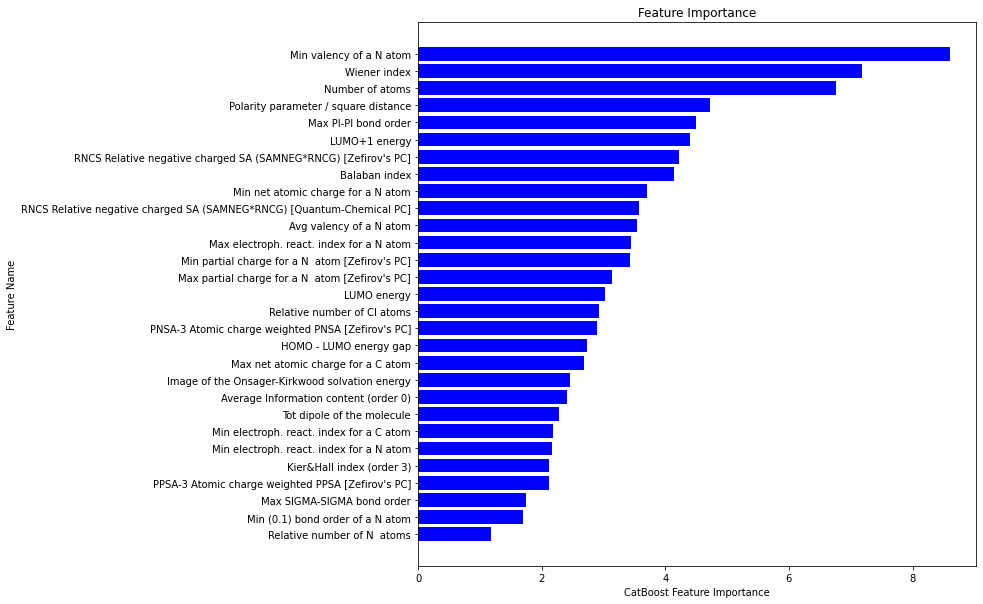

In [26]:
plt.figure(figsize=(10,10))
plt.barh(x.columns[sorted_feature_importance], 
        regressor.feature_importances_[sorted_feature_importance], align='center',alpha=1,
        color='blue')
plt.xlabel("CatBoost Feature Importance")
plt.ylabel("Feature Name")
plt.title('Feature Importance')

In [27]:
import shap

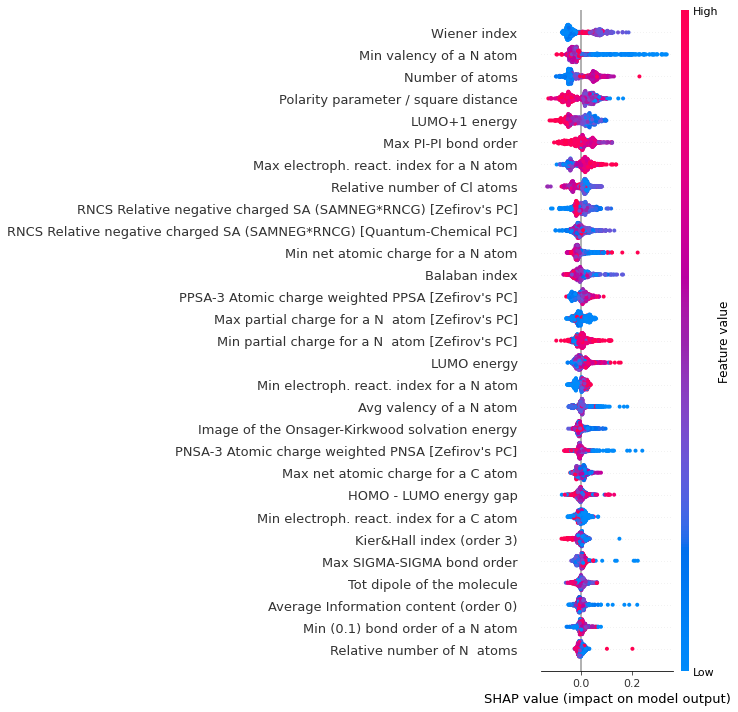

In [31]:
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values, x_train, x.columns, show = False, plot_size=[10,10], max_display=x_train.shape[1])
plt.gcf().set_size_inches(10,10)

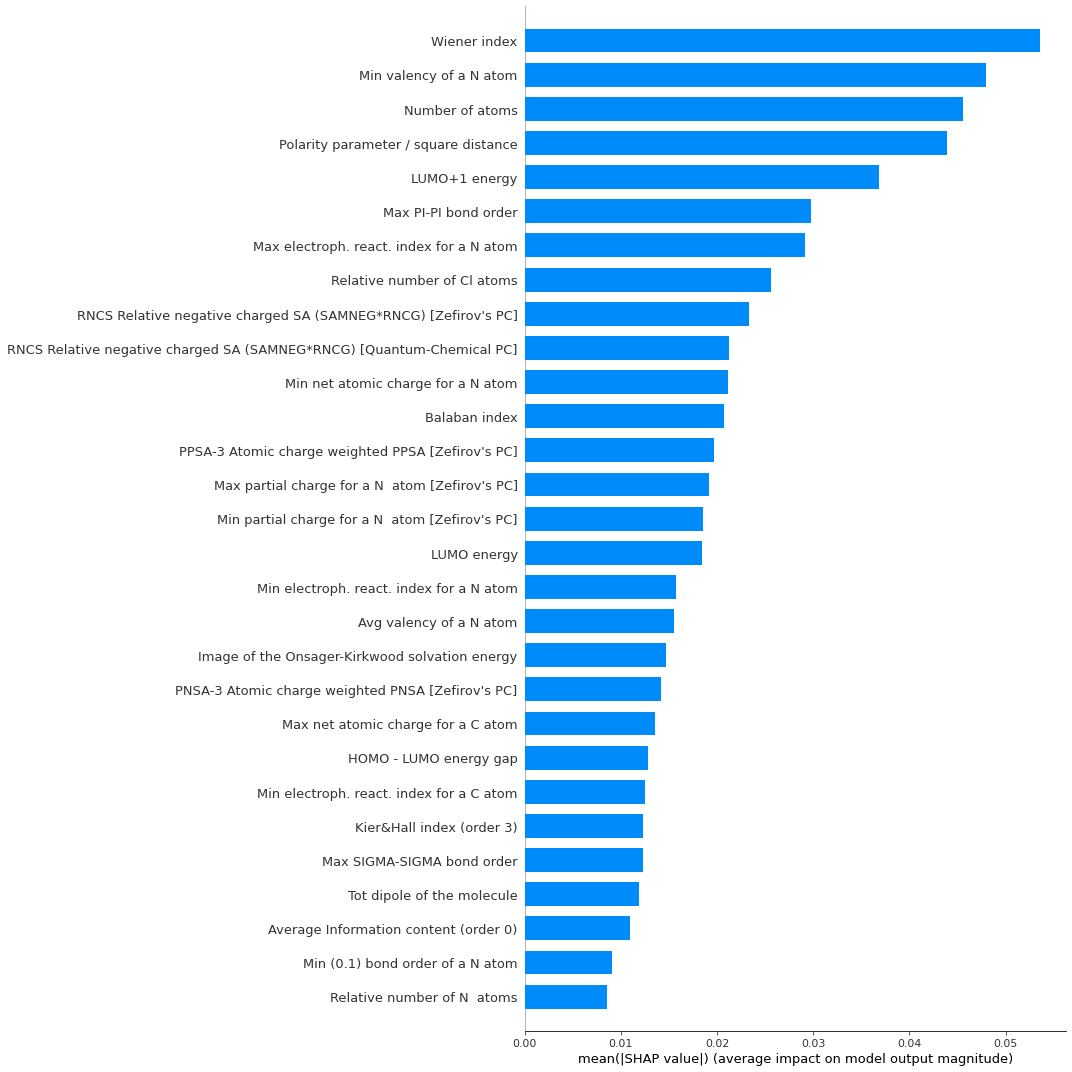

In [29]:
shap.summary_plot(shap_values, x_train, plot_type="bar", max_display=x.shape[1], plot_size=[15,15])

In [45]:
# parameter tuning grid searchCV
from sklearn.model_selection import GridSearchCV

In [46]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}

In [47]:
regressor_grid = GridSearchCV(estimator =regressor1, param_grid=grid,
                              cv = 5, verbose =2,
                              n_jobs= -1,  scoring = "neg_mean_squared_error")



In [48]:
regressor_grid.fit (x_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
0:	learn: 0.4689367	total: 15.8ms	remaining: 3.13s
1:	learn: 0.4455432	total: 114ms	remaining: 11.3s
2:	learn: 0.4262150	total: 208ms	remaining: 13.6s
3:	learn: 0.4093722	total: 332ms	remaining: 16.3s
4:	learn: 0.3928102	total: 424ms	remaining: 16.5s
5:	learn: 0.3795109	total: 519ms	remaining: 16.8s
6:	learn: 0.3635736	total: 607ms	remaining: 16.7s
7:	learn: 0.3510385	total: 711ms	remaining: 17.1s
8:	learn: 0.3392952	total: 755ms	remaining: 16s
9:	learn: 0.3294088	total: 801ms	remaining: 15.2s
10:	learn: 0.3172633	total: 860ms	remaining: 14.8s
11:	learn: 0.3087625	total: 944ms	remaining: 14.8s
12:	learn: 0.3022954	total: 972ms	remaining: 14s
13:	learn: 0.2937857	total: 1.01s	remaining: 13.5s
14:	learn: 0.2876662	total: 1.07s	remaining: 13.2s
15:	learn: 0.2809152	total: 1.13s	remaining: 13s
16:	learn: 0.2744983	total: 1.18s	remaining: 12.7s
17:	learn: 0.2686630	total: 1.23s	remaining: 12.4s
18:	learn: 0.2631851	total: 1.29s	r

165:	learn: 0.0476770	total: 6.95s	remaining: 1.42s
166:	learn: 0.0472717	total: 6.99s	remaining: 1.38s
167:	learn: 0.0468148	total: 7.01s	remaining: 1.34s
168:	learn: 0.0462071	total: 7.05s	remaining: 1.29s
169:	learn: 0.0455765	total: 7.08s	remaining: 1.25s
170:	learn: 0.0450752	total: 7.11s	remaining: 1.21s
171:	learn: 0.0445131	total: 7.15s	remaining: 1.16s
172:	learn: 0.0441724	total: 7.19s	remaining: 1.12s
173:	learn: 0.0436072	total: 7.22s	remaining: 1.08s
174:	learn: 0.0433001	total: 7.25s	remaining: 1.04s
175:	learn: 0.0430445	total: 7.32s	remaining: 998ms
176:	learn: 0.0427866	total: 7.35s	remaining: 956ms
177:	learn: 0.0421908	total: 7.38s	remaining: 913ms
178:	learn: 0.0420615	total: 7.42s	remaining: 870ms
179:	learn: 0.0418011	total: 7.45s	remaining: 828ms
180:	learn: 0.0412746	total: 7.48s	remaining: 785ms
181:	learn: 0.0408766	total: 7.5s	remaining: 742ms
182:	learn: 0.0406680	total: 7.53s	remaining: 700ms
183:	learn: 0.0404261	total: 7.57s	remaining: 658ms
184:	learn: 0

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001873673E3A0>,
             n_jobs=-1,
             param_grid={'depth': [2, 4, 6, 8], 'iterations': [100, 150, 200],
                         'l2_leaf_reg': [0.2, 0.5, 1, 3],
                         'learning_rate': [0.03, 0.1]},
             scoring='neg_mean_squared_error', verbose=2)

In [49]:
regressor_grid.best_params_

{'depth': 8, 'iterations': 200, 'l2_leaf_reg': 0.2, 'learning_rate': 0.1}

In [50]:
regressor_grid.best_score_

-0.07660191515400258

In [33]:
from sklearn.datasets import make_hastie_10_2
from sklearn.inspection import PartialDependenceDisplay